<a href="https://colab.research.google.com/github/niklaust/Analyzing_Academy_Award_Nominated_Films/blob/main/Analyzing_Academy_Award_Nominated_Films_for_Best_Picture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b>Analyzing Academy Award-Nominated Films for Best Picture<br /> using Data Science: A Descriptive Analysis of Genre, Rating, Gross,<br />followed by Text-Based Clustering</b></center></h1>

github:niklaust

# **Data Extraction** 

## **Web Scrapping**

### **Academy award Best Picture Nominated**

Scrapping Academy award Best Picture Nominated from IMDb website. There are 594 films 

In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import re


film_titles = []
year = []  # movie release year
rates = []
length = []
genres = []
rating_star = []
metascores = []
summaries = []
directors = []
stars = []
votes = []
gross = []

for i in range(0, 594, 50): 
  url = f'https://www.imdb.com/search/title/?groups=oscar_best_picture_nominees&sort=year,asc&start={i+1}&ref_=adv_nxt'
  response = requests.get(url)
  soup = BeautifulSoup(response.content, 'html.parser')
  # print(i)

  for movie in soup.find_all('h3', class_='lister-item-header'):
      film_titles.append(movie.find('a').text)
      # print(movie.find('a').text)

      year_tag = movie.find('span', class_='lister-item-year')
      year_val = [int(num) for num in re.findall(r'\d+', year_tag.text)] if year_tag.text else [np.nan]
      if not year_val:
        year_val = [np.nan]
      year.extend(year_val)

  for movie in soup.find_all('div', class_='lister-item-content'):

      text_muted_tag = movie.find('p', class_='text-muted')

      rate_tag  = text_muted_tag.find('span', class_='certificate')
      rate_val = rate_tag.text.strip() if rate_tag else np.nan
      rates.append(rate_val)

      length_tag = text_muted_tag.find('span', class_='runtime')
      length_val = [int(num) for num in re.findall(r'\d+', length_tag.text)] if length_tag.text else [np.nan]
      length.extend(length_val)


      genre_tag = text_muted_tag.find('span', class_='genre')
      genre_val = [g.strip() for g in genre_tag.text.split(',')] if genre_tag else [np.nan]
      genres.append(genre_val)

      rating_bar_tag = movie.find('div', class_='ratings-bar')

      if rating_bar_tag:
        rating_star_tag = rating_bar_tag.find('strong')
        rating_star_val = int(re.findall(r'\d+', rating_star_tag.text)[0]) if rating_star_tag else np.nan

        metascores_tag = rating_bar_tag.find('span', class_='metascore')
        metascore_val = int(re.findall(r'\d+', metascores_tag.text)[0]) if metascores_tag else np.nan
      else:
        rating_star_val = np.nan
        metascore_val = np.nan

      rating_star.append(rating_star_val)
      metascores.append(metascore_val)

      summary_tag = movie.find_all('p', class_='text-muted')[1]
      summary = summary_tag.text.strip() if summary_tag else np.nan
      summaries.append(summary)
      
      credits = movie.find('p', class_='').text.strip()
      credits = credits.split('|')
      director = np.nan
      star_list = np.nan
      for credit in credits:
          if 'Director' in credit:
              director = [credit.replace('Director:', '').replace('\n', '').strip()]
          if 'Directors' in credit:
              director = [director.replace('\n', '').strip() for director in credit.replace('Directors:', '').split(',')]
          elif 'Stars' in credit:
              star_list = [star.replace('\n', '').strip() for star in credit.replace('Stars:', '').split(',')]
      directors.append(director)
      stars.append(star_list)

      sort_num_v_tags = movie.find_all('p', class_='sort-num_votes-visible')
      vote_val = np.nan
      gross_val = np.nan
      for sort_num_v_tag in sort_num_v_tags:
        votes_tag = sort_num_v_tag.find('span', attrs={'name': 'nv'})
        vote_val = int(votes_tag['data-value'].replace(',', '')) if votes_tag else np.nan

        gross_tag = sort_num_v_tag.find('span', class_='text-muted', string='Gross:')
        gross_val = gross_tag.find_next_sibling('span').text.strip() if gross_tag else np.nan

      votes.append(vote_val)
      gross.append(gross_val)

In [ ]:
len(film_titles), len(year), len(rates), len(length), len(genres), len(rating_star), len(metascores), len(summaries), len(directors), len(stars), len(votes), len(gross)

(594, 594, 594, 594, 594, 594, 594, 594, 594, 594, 594, 594)

In [ ]:
import pandas as pd

# Create Dictionary from raw data
raw_data = {
    'Film Title': film_titles,
    'Year': year,
    'Rates': rates,
    'Length': length,
    'Genres': genres,
    'Rating Star': rating_star,
    'Metascores': metascores,
    'Summaries': summaries,
    'Directors': directors,
    'Stars': stars,
    'Votes': votes,
    'Gross': gross
}

In [ ]:
# Create DataFrame
raw_df = pd.DataFrame(raw_data)

raw_df.head()

,Film Title,Year,Rates,Length,Genres,Rating Star,Metascores,Summaries,Directors,Stars,Votes,Gross
0,Sunrise,1927,Passed,94,"[Drama, Romance]",8.0,95.0,A sophisticated city woman seduces a farmer an...,[F.W. Murnau],"[George O'Brien, Janet Gaynor, Margaret Living...",52130.0,$0.54M
1,Wings,1927,PG-13,144,"[Drama, Romance, War]",7.0,NaN,"Two young men, one rich, one middle class, who...","[William A. Wellman, Harry d'Abbadie d'Arrast]","[Clara Bow, Charles 'Buddy' Rogers, Richard Ar...",13579.0,$6.59M
2,7th Heaven,1927,NaN,110,"[Drama, Romance]",7.0,NaN,"A street cleaner saves a young woman's life, a...",[Frank Borzage],"[Janet Gaynor, Charles Farrell, Ben Bard, Albe...",3843.0,$3.92M
3,Chang: A Drama of the Wilderness,1927,Passed,69,"[Documentary, Adventure, Drama]",6.0,NaN,A snapshot of life in the jungles of Northern ...,"[Merian C. Cooper, Ernest B. Schoedsack]","[Kru, Chantui, Nah, Ladah]",1042.0,$0.61M
4,The Crowd,1928,Not Rated,98,"[Drama, Music, Romance]",8.0,NaN,The life of a man and woman together in a larg...,[King Vidor],"[Eleanor Boardman, James Murray, Bert Roach, E...",8729.0,NaN


### **Checked Nominated**

In [ ]:
from bs4 import BeautifulSoup
import re

years = []  # movie nominated year 
movies = []

url = "https://en.wikipedia.org/wiki/Academy_Award_for_Best_Picture"

response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")
tables = soup.find_all('table', {'class': 'wikitable'})

for i, table in enumerate(tables):
  if i < 11:
    for row in table.find_all("tr")[1:]:
        text = row.find_all("td")[0].text.strip()
        if re.match(r'^(?!1917)\d{4}', text): 
          year = text[:4]
        
        if not re.search(r'^(?!1917)\d{4}/?', text):
          movie = row.find_all("td")[0].text.strip()
          movies.append(movie)
          years.append(int(year)) 

In [ ]:
AABP_Nom = {
    'Film Title': movies,
    'Year': years    
}

In [ ]:
import pandas as pd

AABP_Nom_df = pd.DataFrame(AABP_Nom)
AABP_Nom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Film Title  591 non-null    object
 1   Year        591 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.4+ KB


### **Academy award Best Picture (Winning)**

In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import re


film_titles = []
year = []
rates = []
length = []
genres = []
rating_star = []
metascores = []
summaries = []
directors = []
stars = []
votes = []
gross = []


url = 'https://www.imdb.com/search/title/?groups=oscar_winner,best_picture_winner&count=100'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
# print(i)

for movie in soup.find_all('h3', class_='lister-item-header'):
    film_titles.append(movie.find('a').text)
    # print(movie.find('a').text)

    year_tag = movie.find('span', class_='lister-item-year')
    year_val = [int(num) for num in re.findall(r'\d+', year_tag.text)] if year_tag.text else [np.nan]
    if not year_val:
      year_val = [np.nan]
    year.extend(year_val)

for movie in soup.find_all('div', class_='lister-item-content'):

    text_muted_tag = movie.find('p', class_='text-muted')

    rate_tag  = text_muted_tag.find('span', class_='certificate')
    rate_val = rate_tag.text.strip() if rate_tag else np.nan
    rates.append(rate_val)

    length_tag = text_muted_tag.find('span', class_='runtime')
    length_val = [int(num) for num in re.findall(r'\d+', length_tag.text)] if length_tag.text else [np.nan]
    length.extend(length_val)


    genre_tag = text_muted_tag.find('span', class_='genre')
    genre_val = [g.strip() for g in genre_tag.text.split(',')] if genre_tag else [np.nan]
    genres.append(genre_val)

    rating_bar_tag = movie.find('div', class_='ratings-bar')

    if rating_bar_tag:
      rating_star_tag = rating_bar_tag.find('strong')
      rating_star_val = int(re.findall(r'\d+', rating_star_tag.text)[0]) if rating_star_tag else np.nan

      metascores_tag = rating_bar_tag.find('span', class_='metascore')
      metascore_val = int(re.findall(r'\d+', metascores_tag.text)[0]) if metascores_tag else np.nan
    else:
      rating_star_val = np.nan
      metascore_val = np.nan

    rating_star.append(rating_star_val)
    metascores.append(metascore_val)

    summary_tag = movie.find_all('p', class_='text-muted')[1]
    summary = summary_tag.text.strip() if summary_tag else np.nan
    summaries.append(summary)
    
    credits = movie.find('p', class_='').text.strip()
    credits = credits.split('|')
    director = np.nan
    star_list = np.nan
    for credit in credits:
        if 'Director' in credit:
            director = [credit.replace('Director:', '').replace('\n', '').strip()]
        if 'Directors' in credit:
            director = [director.replace('\n', '').strip() for director in credit.replace('Directors:', '').split(',')]
        elif 'Stars' in credit:
            star_list = [star.replace('\n', '').strip() for star in credit.replace('Stars:', '').split(',')]
    directors.append(director)
    stars.append(star_list)

    sort_num_v_tags = movie.find_all('p', class_='sort-num_votes-visible')
    vote_val = np.nan
    gross_val = np.nan
    for sort_num_v_tag in sort_num_v_tags:
      votes_tag = sort_num_v_tag.find('span', attrs={'name': 'nv'})
      vote_val = int(votes_tag['data-value'].replace(',', '')) if votes_tag else np.nan

      gross_tag = sort_num_v_tag.find('span', class_='text-muted', string='Gross:')
      gross_val = gross_tag.find_next_sibling('span').text.strip() if gross_tag else np.nan

    votes.append(vote_val)
    gross.append(gross_val)

In [ ]:
import pandas as pd

# Create Dictionary from raw data
BP_AA = {
    'Film Title': film_titles,
    'Year': year,
    'Rates': rates,
    'Length': length,
    'Genres': genres,
    'Rating Star': rating_star,
    'Metascores': metascores,
    'Summaries': summaries,
    'Directors': directors,
    'Stars': stars,
    'Votes': votes,
    'Gross': gross
}

In [ ]:
# Create DataFrame
BPAA_df = pd.DataFrame(BP_AA)

BPAA_df = BPAA_df.sort_values(by='Year')

BPAA_df.reset_index(drop=True, inplace=True)

BPAA_df.head()

,Film Title,Year,Rates,Length,Genres,Rating Star,Metascores,Summaries,Directors,Stars,Votes,Gross
0,Sunrise,1927,Passed,94,"[Drama, Romance]",8,95.0,A sophisticated city woman seduces a farmer an...,[F.W. Murnau],"[George O'Brien, Janet Gaynor, Margaret Living...",52130,$0.54M
1,Wings,1927,PG-13,144,"[Drama, Romance, War]",7,NaN,"Two young men, one rich, one middle class, who...","[William A. Wellman, Harry d'Abbadie d'Arrast]","[Clara Bow, Charles 'Buddy' Rogers, Richard Ar...",13579,$6.59M
2,The Broadway Melody,1929,Passed,100,"[Drama, Musical, Romance]",5,NaN,A pair of sisters from the vaudeville circuit ...,[Harry Beaumont],"[Bessie Love, Anita Page, Charles King, Eddie ...",7584,$6.12M
3,All Quiet on the Western Front,1930,Passed,152,"[Drama, War]",8,91.0,"A German youth eagerly enters World War I, but...",[Lewis Milestone],"[Lew Ayres, Louis Wolheim, John Wray, Arnold L...",65162,$3.27M
4,Cimarron,1931,Passed,123,"[Drama, Music, Western]",5,70.0,A newspaper editor settles in an Oklahoma boom...,[Wesley Ruggles],"[Richard Dix, Irene Dunne, Estelle Taylor, Nan...",6542,NaN


### **Ticket Price**

A ticket price between 1910 to 2020

In [ ]:
import requests
from bs4 import BeautifulSoup
import re


url = 'https://help.imdb.com/article/imdbpro/industry-research/box-office-mojo-by-imdbpro-faq/GCWTV4MQKGWRAUAP#inflation'

response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'class': 'a-section a-padding-medium a-text-left'})


years = []
prices = []

for i in range(8, 0 ,-1): 
  table = soup.find_all('table')[i]

  rows = table.find_all('tr')

  for i, row in enumerate(rows):
    if i == 0:
      cols = row.find_all('td')
      for td in cols:
        year = int(re.findall(r'\d+', td.text)[0])
        years.append(year)
    else:
      cols = row.find_all('td')
      for td in cols:
        price = re.findall(r'\$(\d+\.\d{2})', td.text)[0]
        prices.append(price)

In [ ]:
import pandas as pd

ticket = {
    'Year': years,
    'Price': prices
}

ticket = pd.DataFrame(ticket)
ticket_df = ticket.sort_values(by='Year', ascending=True).reset_index(drop=True)

ticket_df.head()

,Year,Price
0,1910,0.07
1,1924,0.25
2,1929,0.35
3,1934,0.23
4,1935,0.24


### **Highest-grossing films**

Highest grossing films from in North America between 1919 - 2022

In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np

Highest_gross_films = {}

for year in range(1919, 2023, 1):
    url = f"https://en.wikipedia.org/wiki/{year}_in_film"
    response = requests.get(url)

    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', {'class': 'wikitable sortable'})

    films = []
    for i, tr in enumerate(table.find_all('tr')):
      if i == 0:
        continue
      row = [td.text.strip() for td in tr.find_all('td')]
      if len(row) == 2 or row[1].startswith("$"):
        row.insert(1, films[-1][1] if films[-1] else np.nan)
      films.append(row)
        
    if bool(films):
        Highest_gross_films[year] = films

In [ ]:
import pandas as pd

HGF_df = pd.DataFrame(columns=['Title', 'Year', 'Studio',  'Gross'])

for year, films in Highest_gross_films.items():
    for film in films:
        HGF_df = pd.concat([HGF_df, pd.DataFrame({'Title': film[0], 'Year': year, 'Studio': film[1], 'Gross': film[2]}, index=[0])], ignore_index=True)

In [ ]:
HGF_df[HGF_df['Year'] == 1942]

,Title,Year,Studio,Gross
207,Mrs. Miniver,1942,Metro-Goldwyn-Mayer,"$5,358,000[1]"
208,Random Harvest,1942,Metro-Goldwyn-Mayer,"$4,650,000[1]"
209,Yankee Doodle Dandy,1942,Warner Bros. Pictures,"$4,631,000[2]"
210,Reap the Wild Wind,1942,Paramount Pictures,"$4,000,000[3]"
211,Road to Morocco,1942,Paramount Pictures,"$3,800,000[4]"
212,Holiday Inn,1942,Paramount Pictures,"$3,750,000[5]"
213,Wake Island,1942,Paramount Pictures,"$3,500,000[5]"
214,The Pride of the Yankees,1942,RKO Radio Pictures/Samuel Goldwyn Productions,"$3,332,000[6][7]"
215,For Me and My Gal,1942,Metro-Goldwyn-Mayer,"$2,894,000[1]"
216,Somewhere I'll Find You,1942,Metro-Goldwyn-Mayer,"$2,885,000[1]"


# **Data Cleaning**

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Film Title   594 non-null    object 
 1   Year         594 non-null    int64  
 2   Rates        590 non-null    object 
 3   Length       594 non-null    int64  
 4   Genres       594 non-null    object 
 5   Rating Star  593 non-null    float64
 6   Metascores   443 non-null    float64
 7   Summaries    594 non-null    object 
 8   Directors    594 non-null    object 
 9   Stars        594 non-null    object 
 10  Votes        593 non-null    float64
 11  Gross        417 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 55.8+ KB


In [ ]:
AABP_Nom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Film Title  591 non-null    object
 1   Year        591 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.4+ KB


In [ ]:
diff_df = raw_df.merge(AABP_Nom_df, on='Film Title', how='outer', indicator=True)
left_only_df = diff_df[diff_df['_merge'] == 'left_only']
left_only_df

,Film Title,Year_x,Rates,Length,Genres,Rating Star,Metascores,Summaries,Directors,Stars,Votes,Gross,Year_y,_merge
0,Sunrise,1927.0,Passed,94.0,"[Drama, Romance]",8.0,95.0,A sophisticated city woman seduces a farmer an...,[F.W. Murnau],"[George O'Brien, Janet Gaynor, Margaret Living...",52130.0,$0.54M,NaN,left_only
3,Chang: A Drama of the Wilderness,1927.0,Passed,69.0,"[Documentary, Adventure, Drama]",6.0,NaN,A snapshot of life in the jungles of Northern ...,"[Merian C. Cooper, Ernest B. Schoedsack]","[Kru, Chantui, Nah, Ladah]",1042.0,$0.61M,NaN,left_only
4,The Crowd,1928.0,Not Rated,98.0,"[Drama, Music, Romance]",8.0,NaN,The life of a man and woman together in a larg...,[King Vidor],"[Eleanor Boardman, James Murray, Bert Roach, E...",8729.0,NaN,NaN,left_only
10,The Hollywood Revue of 1929,1929.0,Passed,130.0,"[Comedy, Music]",5.0,NaN,An all-star revue featuring MGM contract players.,"[Charles Reisner, Christy Cabanne, Norman Hous...","[Conrad Nagel, Jack Benny, John Gilbert, Norma...",2163.0,NaN,NaN,left_only
97,The Grand Illusion,1937.0,Not Rated,113.0,"[Drama, War]",8.0,NaN,"During WWI, two French soldiers are captured a...",[Jean Renoir],"[Jean Gabin, Dita Parlo, Pierre Fresnay, Erich...",37513.0,$0.17M,NaN,left_only
140,49th Parallel,1941.0,Not Rated,123.0,"[Drama, Thriller, War]",7.0,NaN,A World War II U-boat crew are stranded in nor...,[Michael Powell],"[Leslie Howard, Laurence Olivier, Raymond Mass...",7101.0,NaN,NaN,left_only
197,Sunset Blvd.,1950.0,Passed,110.0,"[Drama, Film-Noir]",8.0,94.0,A screenwriter develops a dangerous relationsh...,[Billy Wilder],"[William Holden, Gloria Swanson, Erich von Str...",225628.0,NaN,NaN,left_only
282,The Russians Are Coming the Russians Are Coming,1966.0,Unrated,126.0,"[Comedy, War]",7.0,69.0,"Without hostile intent, a Soviet submarine run...",[Norman Jewison],"[Carl Reiner, Eva Marie Saint, Alan Arkin, Bri...",9286.0,$21.69M,NaN,left_only
311,Cries & Whispers,1972.0,R,91.0,[Drama],8.0,NaN,When a woman dying of cancer in early twentiet...,[Ingmar Bergman],"[Harriet Andersson, Liv Ullmann, Kari Sylwan, ...",35240.0,$1.74M,NaN,left_only
356,E.T.,1982.0,PG,115.0,"[Adventure, Family, Sci-Fi]",7.0,91.0,A troubled child summons the courage to help a...,[Steven Spielberg],"[Henry Thomas, Drew Barrymore, Peter Coyote, D...",418528.0,$435.11M,NaN,left_only


In [ ]:
! pip install fuzzywuzzy

In [ ]:
Extra_films = left_only_df['Film Title'].values
check_films = AABP_Nom_df['Film Title'].values

In [ ]:
Extra_films

array(['Sunrise', 'Chang: A Drama of the Wilderness', 'The Crowd',
       'The Hollywood Revue of 1929', 'The Grand Illusion',
       '49th Parallel', 'Sunset Blvd.',
       'The Russians Are Coming the Russians Are Coming',
       'Cries & Whispers', 'E.T.', 'The Postman',
       'Good Night, and Good Luck.', 'Precious'], dtype=object)

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

for Cfilm in check_films:
  for Efilm in Extra_films:
    if fuzz.token_set_ratio(Efilm, Cfilm) > 80:
      print(f"{Efilm}.........{Cfilm} is found")

The Hollywood Revue of 1929.........Hollywood Revue is found
The Grand Illusion.........Grand Illusion is found
49th Parallel.........49th Parallel[39] is found
Sunset Blvd..........Sunset Boulevard is found
The Russians Are Coming the Russians Are Coming.........The Russians Are Coming, the Russians Are Coming is found
Cries & Whispers.........Cries and Whispers is found
E.T..........E.T. the Extra-Terrestrial is found
The Postman.........The Postman (Il Postino) is found
Good Night, and Good Luck..........Good Night, and Good Luck is found
Precious.........Precious: Based on the Novel 'Push' by Sapphire is found
The Postman.........The Post is found


In [ ]:
movies_to_drop = ['Sunrise', 'Chang: A Drama of the Wilderness', 'The Crowd']
raw_df = raw_df[~raw_df['Film Title'].isin(movies_to_drop)].reset_index(drop=True)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Film Title   591 non-null    object 
 1   Year         591 non-null    int64  
 2   Rates        587 non-null    object 
 3   Length       591 non-null    int64  
 4   Genres       591 non-null    object 
 5   Rating Star  590 non-null    float64
 6   Metascores   442 non-null    float64
 7   Summaries    591 non-null    object 
 8   Directors    591 non-null    object 
 9   Stars        591 non-null    object 
 10  Votes        590 non-null    float64
 11  Gross        415 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 55.5+ KB


In [ ]:
BPAA_df = BPAA_df[~BPAA_df['Film Title'].isin(movies_to_drop)].reset_index(drop=True)
BPAA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Film Title   95 non-null     object 
 1   Year         95 non-null     int64  
 2   Rates        95 non-null     object 
 3   Length       95 non-null     int64  
 4   Genres       95 non-null     object 
 5   Rating Star  95 non-null     int64  
 6   Metascores   81 non-null     float64
 7   Summaries    95 non-null     object 
 8   Directors    95 non-null     object 
 9   Stars        95 non-null     object 
 10  Votes        95 non-null     int64  
 11  Gross        83 non-null     object 
dtypes: float64(1), int64(4), object(7)
memory usage: 9.0+ KB


## **change data type**

### **change list to string for Genres, Directors, Stars columns**

#### **Nominated**

In [ ]:
# function transform list to string 
def list_to_string(lst):
  if isinstance(lst, list) and len(lst) > 0:
    return ','.join(lst)
  else:
    return np.nan

In [ ]:
mod_df = raw_df.copy()

mod_df['Genres'] = mod_df['Genres'].apply(list_to_string)
mod_df['Directors'] = mod_df['Directors'].apply(list_to_string)
mod_df['Stars'] = mod_df['Stars'].apply(list_to_string)

mod_df.head()

,Film Title,Year,Rates,Length,Genres,Rating Star,Metascores,Summaries,Directors,Stars,Votes,Gross
0,Wings,1927,PG-13,144,"Drama,Romance,War",7.0,NaN,"Two young men, one rich, one middle class, who...","William A. Wellman,Harry d'Abbadie d'Arrast","Clara Bow,Charles 'Buddy' Rogers,Richard Arlen...",13579.0,$6.59M
1,7th Heaven,1927,NaN,110,"Drama,Romance",7.0,NaN,"A street cleaner saves a young woman's life, a...",Frank Borzage,"Janet Gaynor,Charles Farrell,Ben Bard,Albert Gran",3843.0,$3.92M
2,In Old Arizona,1928,Passed,95,"Music,Western",5.0,NaN,"A charming, happy-go-lucky bandit in old Arizo...",Irving Cummings,"Edmund Lowe,Warner Baxter,Dorothy Burgess,Henr...",1193.0,$2.83M
3,The Racket,1928,Passed,84,"Crime,Drama,Film-Noir",6.0,NaN,An honest police captain vows to bring down a ...,Lewis Milestone,"Thomas Meighan,Louis Wolheim,Marie Prevost,G. ...",1397.0,NaN
4,The Patriot,1928,NaN,113,"Drama,History,Thriller",NaN,NaN,"Paul I, the Emperor of All Russia, becomes the...",Ernst Lubitsch,"Emil Jannings,Lewis Stone,Florence Vidor,Vera ...",NaN,NaN


#### **Winning**

In [ ]:
BPAA_df = BPAA_df.copy()

BPAA_df['Genres'] = BPAA_df['Genres'].apply(list_to_string)
BPAA_df['Directors'] = BPAA_df['Directors'].apply(list_to_string)
BPAA_df['Stars'] = BPAA_df['Stars'].apply(list_to_string)

### **change Gross column from object to int**

#### **Nominated**

In [ ]:
mod_df['Gross'] = mod_df['Gross'].str.replace('$', '', regex=False).str.replace('M', '', regex=False).astype(float)

mod_df['Gross'] *=  1000000

In [ ]:
mod_df['Gross'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 591 entries, 0 to 590
Series name: Gross
Non-Null Count  Dtype  
--------------  -----  
415 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


#### **Winning**

In [ ]:
BPAA_df['Gross'] = BPAA_df['Gross'].str.replace('$', '', regex=False).str.replace('M', '', regex=False).astype(float)

BPAA_df['Gross'] *= 1000000

In [ ]:
BPAA_df.head()

,Film Title,Year,Rates,Length,Genres,Rating Star,Metascores,Summaries,Directors,Stars,Votes,Gross
0,Wings,1927,PG-13,144,"Drama,Romance,War",7,NaN,"Two young men, one rich, one middle class, who...","William A. Wellman,Harry d'Abbadie d'Arrast","Clara Bow,Charles 'Buddy' Rogers,Richard Arlen...",13579,6590000.0
1,The Broadway Melody,1929,Passed,100,"Drama,Musical,Romance",5,NaN,A pair of sisters from the vaudeville circuit ...,Harry Beaumont,"Bessie Love,Anita Page,Charles King,Eddie Kane",7584,6120000.0
2,All Quiet on the Western Front,1930,Passed,152,"Drama,War",8,91.0,"A German youth eagerly enters World War I, but...",Lewis Milestone,"Lew Ayres,Louis Wolheim,John Wray,Arnold Lucy",65162,3270000.0
3,Cimarron,1931,Passed,123,"Drama,Music,Western",5,70.0,A newspaper editor settles in an Oklahoma boom...,Wesley Ruggles,"Richard Dix,Irene Dunne,Estelle Taylor,Nance O...",6542,NaN
4,Grand Hotel,1932,Not Rated,112,"Drama,Romance",7,NaN,A group of very different individuals staying ...,Edmund Goulding,"Greta Garbo,John Barrymore,Joan Crawford,Walla...",20047,2690000.0


In [ ]:
import re

def extract_numeric_value(s):
  match = re.search(r'\$(\d[\d,]*)', s)
  if match:
    return int(match.group(1).replace(',', ''))
  else:
    return None

In [ ]:
HGF_df['Gross'] = HGF_df['Gross'].apply(extract_numeric_value)

In [ ]:
HGF_df['Gross'].describe()

count    1.017000e+03
mean     2.333260e+08
std      3.708141e+08
min      8.300000e+04
25%      4.245000e+06
50%      2.250000e+07
75%      3.589948e+08
max      2.797501e+09
Name: Gross, dtype: float64

# **Data Wrangling**

## **Nominated**

In [ ]:
mod_df['Genres'].value_counts()

Drama,Romance              57
Drama                      54
Comedy,Drama,Romance       36
Biography,Drama,History    33
Comedy,Drama               22
                           ..
Comedy,Music                1
Action,Crime,Romance        1
Comedy                      1
Romance,Drama               1
Action,Drama                1
Name: Genres, Length: 137, dtype: int64

In [ ]:
# Function to sort Genres
def sort_variable(variable):
    return ','.join(sorted(variable.split(',')))

# apply function to a Genres column
mod_df['Genres'] = mod_df['Genres'].apply(sort_variable)

mod_df['Genres'].value_counts()

Drama,Romance                58
Drama                        54
Comedy,Drama,Romance         36
Biography,Drama,History      33
Comedy,Drama                 22
                             ..
Film-Noir,Mystery,Romance     1
Music,Western                 1
Comedy                        1
Biography,Drama,Mystery       1
Action,Drama                  1
Name: Genres, Length: 136, dtype: int64

## **Make dummie variable**

There are 21 genres of movies

**Nominated**

In [ ]:
mod_df["Genres"].str.get_dummies(",").sum()

Action        44
Adventure     67
Animation      3
Biography    110
Comedy       134
Crime         72
Drama        520
Family        33
Fantasy       23
Film-Noir     15
History       60
Horror         2
Music         40
Musical       30
Mystery       32
Romance      172
Sci-Fi        11
Sport         11
Thriller      44
War           45
Western       16
dtype: int64

In [ ]:
dummies_genres = mod_df["Genres"].str.get_dummies(",")

In [ ]:
dummies_genres.shape[1]

21

## **Merging dummies variable to DataFrame**

### **Nominated**

In [ ]:
mod_df = mod_df.join(dummies_genres)

In [ ]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Film Title   591 non-null    object 
 1   Year         591 non-null    int64  
 2   Rates        587 non-null    object 
 3   Length       591 non-null    int64  
 4   Genres       591 non-null    object 
 5   Rating Star  590 non-null    float64
 6   Metascores   442 non-null    float64
 7   Summaries    591 non-null    object 
 8   Directors    591 non-null    object 
 9   Stars        591 non-null    object 
 10  Votes        590 non-null    float64
 11  Gross        415 non-null    float64
 12  Action       591 non-null    int64  
 13  Adventure    591 non-null    int64  
 14  Animation    591 non-null    int64  
 15  Biography    591 non-null    int64  
 16  Comedy       591 non-null    int64  
 17  Crime        591 non-null    int64  
 18  Drama        591 non-null    int64  
 19  Family  

### **Winning**

In [ ]:
BPAA_df = BPAA_df.join(BPAA_df["Genres"].str.get_dummies(","))

In [ ]:
BPAA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Film Title   95 non-null     object 
 1   Year         95 non-null     int64  
 2   Rates        95 non-null     object 
 3   Length       95 non-null     int64  
 4   Genres       95 non-null     object 
 5   Rating Star  95 non-null     int64  
 6   Metascores   81 non-null     float64
 7   Summaries    95 non-null     object 
 8   Directors    95 non-null     object 
 9   Stars        95 non-null     object 
 10  Votes        95 non-null     int64  
 11  Gross        83 non-null     float64
 12  Action       95 non-null     int64  
 13  Adventure    95 non-null     int64  
 14  Biography    95 non-null     int64  
 15  Comedy       95 non-null     int64  
 16  Crime        95 non-null     int64  
 17  Drama        95 non-null     int64  
 18  Family       95 non-null     int64  
 19  Fantasy   

# **Save DataFrame**

In [ ]:
mod_df.to_pickle('Best_Picture_Nominated.pkl')

In [ ]:
mod_df.to_csv('Best_Picture_Nominated.csv', index=False)

In [ ]:
BPAA_df.to_pickle('Best_Picture_Winning.pkl')

In [ ]:
ticket_df.to_pickle('Ticket_prices.pkl')

In [ ]:
HGF_df.to_pickle('Highest_grossing_films.pkl')

In [ ]:
AABP_Nom_df.to_pickle('Best_Picture_Nominated_title_only.pkl')

# **Load DataFrame**

In [ ]:
import pandas as pd

In [ ]:
film_df = pd.read_pickle('Best_Picture_Nominated.pkl')

In [ ]:
BPAA_df = pd.read_pickle('Best_Picture_Winning.pkl')

In [ ]:
ticket_df = pd.read_pickle('Ticket_prices.pkl')

In [ ]:
HGF_df = pd.read_pickle('Highest_grossing_films.pkl')

In [ ]:
AABP_Nom_df = pd.read_pickle('Best_Picture_Nominated_title_only.pkl')

# **Analysis**

## **General infomation of DataFrame**

In [ ]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Film Title   591 non-null    object 
 1   Year         591 non-null    int64  
 2   Rates        587 non-null    object 
 3   Length       591 non-null    int64  
 4   Genres       591 non-null    object 
 5   Rating Star  590 non-null    float64
 6   Metascores   442 non-null    float64
 7   Summaries    591 non-null    object 
 8   Directors    591 non-null    object 
 9   Stars        591 non-null    object 
 10  Votes        590 non-null    float64
 11  Gross        415 non-null    float64
 12  Action       591 non-null    int64  
 13  Adventure    591 non-null    int64  
 14  Animation    591 non-null    int64  
 15  Biography    591 non-null    int64  
 16  Comedy       591 non-null    int64  
 17  Crime        591 non-null    int64  
 18  Drama        591 non-null    int64  
 19  Family  

In [ ]:
BPAA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Film Title   95 non-null     object 
 1   Year         95 non-null     int64  
 2   Rates        95 non-null     object 
 3   Length       95 non-null     int64  
 4   Genres       95 non-null     object 
 5   Rating Star  95 non-null     int64  
 6   Metascores   81 non-null     float64
 7   Summaries    95 non-null     object 
 8   Directors    95 non-null     object 
 9   Stars        95 non-null     object 
 10  Votes        95 non-null     int64  
 11  Gross        83 non-null     float64
 12  Action       95 non-null     int64  
 13  Adventure    95 non-null     int64  
 14  Biography    95 non-null     int64  
 15  Comedy       95 non-null     int64  
 16  Crime        95 non-null     int64  
 17  Drama        95 non-null     int64  
 18  Family       95 non-null     int64  
 19  Fantasy   

## **Number of Films Nominated by Year**

In [ ]:
AABP_Nom_df['Year'].value_counts()

1934    12
1935    12
2022    10
1938    10
2010    10
        ..
1966     5
1965     5
1964     5
1963     5
1927     3
Name: Year, Length: 95, dtype: int64

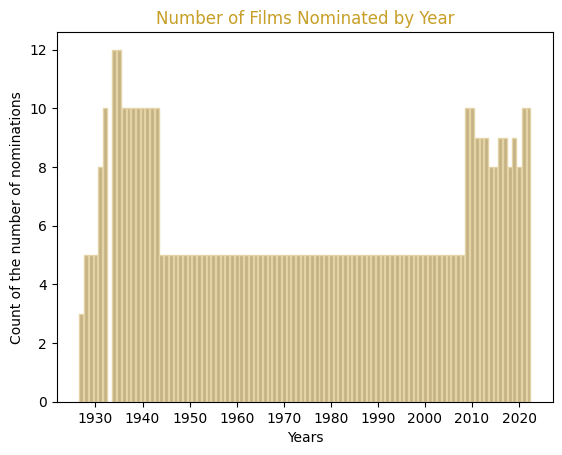

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots()

year_counts = AABP_Nom_df['Year'].value_counts()

ax.bar(year_counts.index, year_counts.values,
        color="#c4b184", edgecolor="#e4d4a5")

ax.xaxis.set_major_locator(MultipleLocator(10))
plt.title('Number of Films Nominated by Year').set_color("#C79F27")
plt.xlabel('Years')
plt.ylabel('Count of the number of nominations')

plt.show()

## **Genre**

In [ ]:
Action_idx = film_df.columns.get_loc('Action')
Western_idx = film_df.columns.get_loc('Western')

num_cols = abs(Action_idx - Western_idx) + 1

print(f"There are {num_cols} of Genres")  

There are 21 of Genres


In [ ]:
import colorsys

num_colors = 21

color_positions = [float(i) / (num_colors - 1) for i in range(num_colors)]

colors_hsv = [(pos, 1, 1) for pos in color_positions]
colors_rgb = [colorsys.hsv_to_rgb(*hsv) for hsv in colors_hsv]

# Convert to %x hexadecimal format
colors_hex = ['#%02x%02x%02x' % tuple(int(c * 255) for c in color) for color in colors_rgb]

### **Nominated**

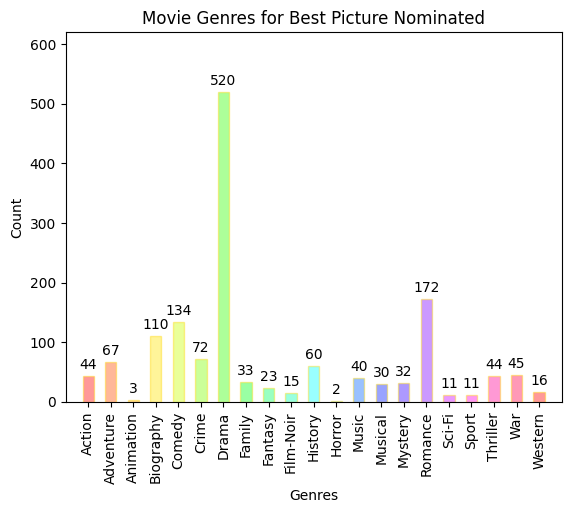

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

genre_counts = film_df.iloc[:, 12:34].sum()

bar_plot = genre_counts.plot.bar()

for patch, c in zip(plt.gca().patches, colors_hex):
  patch.set_facecolor(c)   
  patch.set_alpha(0.4)  
  patch.set_edgecolor('#FFD700')  
  patch.set_linewidth(1) 

for i, patch in enumerate(bar_plot.patches):
    plt.annotate(str(int(patch.get_height())), 
                 xy=(patch.get_x() + patch.get_width() / 2, 
                     patch.get_height()),
                 xytext=(0, 3), textcoords='offset points', 
                 ha='center', va='bottom')

plt.title("Movie Genres for Best Picture Nominated")
plt.xlabel("Genres")
plt.ylabel("Count")

plt.xlim(-1, len(genre_counts))
plt.ylim(0, max(genre_counts) + 100)

plt.show()

In [ ]:
# Out of the total of 591 films, 71 of them are not categorized as Drama
film_df['Film Title'][film_df['Drama'] == 0].value_counts().sum()

71

### **Winning**

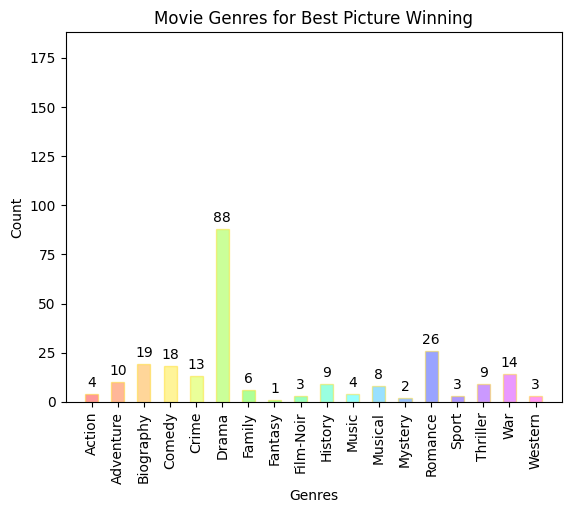

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

genre_counts = BPAA_df.iloc[:, 12:33].sum()

bar_plot = genre_counts.plot.bar()

for patch, c in zip(plt.gca().patches, colors_hex):
  patch.set_facecolor(c)   
  patch.set_alpha(0.4)  
  patch.set_edgecolor('#FFD700')  
  patch.set_linewidth(1) 

for i, patch in enumerate(bar_plot.patches):
    plt.annotate(str(int(patch.get_height())), 
                 xy=(patch.get_x() + patch.get_width() / 2, 
                     patch.get_height()),
                 xytext=(0, 3), textcoords='offset points', 
                 ha='center', va='bottom')

plt.title("Movie Genres for Best Picture Winning")
plt.xlabel("Genres")
plt.ylabel("Count")

plt.xlim(-1, len(genre_counts))
plt.ylim(0, max(genre_counts) + 100)

plt.show()

In [ ]:
# Only seven films that were not categorized as drama have won the Academy Award for Best Picture
BPAA_df[['Film Title','Year', 'Genres', 'Summaries']][BPAA_df['Drama'] == 0]

,Film Title,Year,Genres,Summaries
6,It Happened One Night,1934,"Comedy,Romance",A renegade reporter trailing a young runaway h...
28,Around the World in 80 Days,1956,"Adventure,Comedy,Family",A Victorian Englishman bets that with the new ...
30,Gigi,1958,"Comedy,Musical,Romance","Weary of the conventions of Parisian society, ..."
35,Tom Jones,1963,"Adventure,Comedy,History",The romantic and chivalrous adventures of adop...
49,Annie Hall,1977,"Comedy,Romance","Alvy Singer, a divorced Jewish comedian, refle..."
74,Chicago,2002,"Comedy,Crime,Musical",Two death-row murderesses develop a fierce riv...
94,Everything Everywhere All at Once,2022,"Action,Adventure,Comedy",A middle-aged Chinese immigrant is swept up in...


In [ ]:
# See The other film competitors in 2002 
film_df[['Film Title', 'Rating Star', 'Metascores', 'Genres']][film_df['Year'] == 2002]

,Film Title,Rating Star,Metascores,Genres
430,The Lord of the Rings: The Two Towers,8.0,87.0,"Action,Adventure,Drama"
431,The Pianist,8.0,85.0,"Biography,Drama,Music"
432,Gangs of New York,7.0,72.0,"Crime,Drama"
433,Chicago,7.0,81.0,"Comedy,Crime,Musical"
434,The Hours,7.0,80.0,"Drama,Romance"


## **IMDb rating and METASCORE**

* [IMDb ratings](https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#) IMDb registered users can cast a vote (from 1 to 10) on every released title in the database 

* [METASCORE](https://www.metacritic.com/about-metascores) is a weighted average of the published critic reviews contained in the chart on that page, and thus does not include any votes or comments from our users.

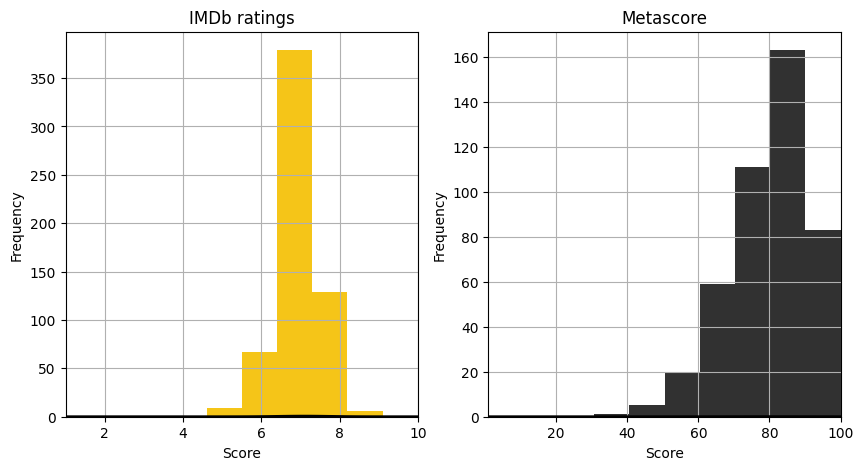

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

colors = ['#f5c518', '#313131']

# Create a histogram with 10 bins for Metascore and Rating Star
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(film_df['Rating Star'], bins=10, range=(1, 10), color=colors[0])
axs[1].hist(film_df['Metascores'], bins=10, range=(1, 100), color=colors[1])

# Fit and plot normal curves for Metascore and Rating Star
x_rating_star = np.linspace(1, 10, 100)
x_metascore = np.linspace(1, 100, 100)

for i, col in enumerate(['Rating Star', 'Metascores']):
    mean = film_df[col].mean()
    std = film_df[col].std()
    if col == 'Rating Star':
        x = x_rating_star
        axs[i].set_xlim(1, 10)
    else:
        x = x_metascore
        axs[i].set_xlim(1, 100)
    y = norm.pdf(x, mean, std)
    axs[i].plot(x, y, 'k-', linewidth=2)

# Set titles and labels
axs[0].set_title('IMDb ratings')
axs[1].set_title('Metascore')
for ax in axs:
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.show()

### **Compare two rating with Z-score**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

colors = ['#f5c518', '#313131' ]

# Compute z-scores for Metascore and IMDb rating
z_rating_star = (film_df['Rating Star'] - film_df['Rating Star'].mean()) / film_df['Rating Star'].std()
z_metascore = (film_df['Metascores'] - film_df['Metascores'].mean()) / film_df['Metascores'].std()

In [ ]:
z_rating_star_sd = z_rating_star.std()
z_rating_star_m = z_rating_star.mean()
d_rating_star  = pd.cut(z_rating_star, 10, precision=2)
d_rating_star

0       (-0.15, 0.47]
1       (-0.15, 0.47]
2       (-3.22, -2.6]
3      (-1.98, -1.37]
4                 NaN
            ...      
586     (-0.15, 0.47]
587     (-0.15, 0.47]
588     (-0.15, 0.47]
589     (-0.15, 0.47]
590    (-1.98, -1.37]
Name: Rating Star, Length: 591, dtype: category
Categories (10, interval[float64, right]): [(-3.22, -2.6] < (-2.6, -1.98] < (-1.98, -1.37] <
                                            (-1.37, -0.76] ... (0.47, 1.08] < (1.08, 1.69] <
                                            (1.69, 2.31] < (2.31, 2.92]]

In [ ]:
d_rating_star_s = pd.value_counts(d_rating_star)
d_rating_star_s

(-0.15, 0.47]     379
(1.08, 1.69]      129
(-1.98, -1.37]     67
(-3.22, -2.6]       9
(2.31, 2.92]        6
(-2.6, -1.98]       0
(-1.37, -0.76]      0
(-0.76, -0.15]      0
(0.47, 1.08]        0
(1.69, 2.31]        0
Name: Rating Star, dtype: int64

In [ ]:
z_metascore_sd = z_metascore.std()
z_metascore_m = z_metascore.mean()
d_metascore  = pd.cut(z_metascore, 10, precision=2)
d_metascore  

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
            ...      
586    (-0.6, -0.013]
587    (-0.013, 0.57]
588      (0.57, 1.16]
589    (-1.77, -1.18]
590    (-0.6, -0.013]
Name: Metascores, Length: 591, dtype: category
Categories (10, interval[float64, right]): [(-4.11, -3.52] < (-3.52, -2.94] < (-2.94, -2.35] <
                                            (-2.35, -1.77] ... (-0.6, -0.013] < (-0.013, 0.57] <
                                            (0.57, 1.16] < (1.16, 1.74]]

In [ ]:
d_metascore_s = pd.value_counts(d_metascore)
d_metascore_s

(0.57, 1.16]      102
(-0.013, 0.57]     97
(-0.6, -0.013]     86
(-1.18, -0.6]      56
(1.16, 1.74]       47
(-1.77, -1.18]     28
(-2.35, -1.77]     16
(-2.94, -2.35]      7
(-3.52, -2.94]      2
(-4.11, -3.52]      1
Name: Metascores, dtype: int64

In [ ]:
print(f"mean of z-score of IMDb rating {z_rating_star_m:.3f}")
print(f"standard deviation of z-score of IMDb rating {z_rating_star_sd:.3f}")
print(f"mean of z-score of metascore {z_metascore_m:.3f}")
print(f"standard deviation of z-score of metascore {z_metascore_sd:.3f}")

mean of z-score of IMDb rating -0.000
standard deviation of z-score of IMDb rating 1.000
mean of z-score of metascore 0.000
standard deviation of z-score of metascore 1.000


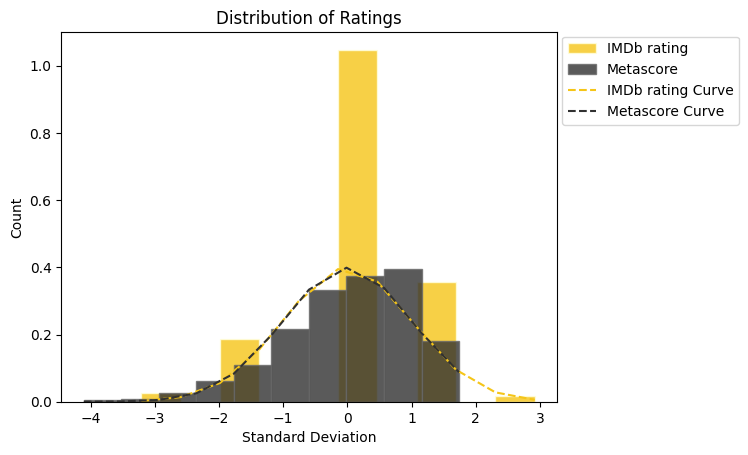

In [ ]:
fig, ax = plt.subplots()

# plot histogram
_, bins_s, ignored_s = plt.hist(z_rating_star, bins=10, density=True, alpha=0.8, 
                              color=colors[0], edgecolor='#FFFFE0',
                              label='IMDb rating', align='mid')

_, bins_m, ignored_m = plt.hist(z_metascore, bins=10, density=True, alpha=0.8,
                              color=colors[1], edgecolor='#696969',
                              label='Metascore', align='mid')

# plot curve
ax.plot(bins_s, 1/(z_rating_star_sd * np.sqrt(2 * np.pi)) *
               np.exp( - (bins_s - z_rating_star_m)**2 / (2 * z_rating_star_sd**2)),
         linewidth=1.5, color=colors[0], linestyle='--', label='IMDb rating Curve')

ax.plot(bins_m, 1/(z_metascore_sd * np.sqrt(2 * np.pi)) *
               np.exp( - (bins_m - z_metascore_m)**2 / (2 * z_metascore_sd**2)),
         linewidth=1.5, color=colors[1], linestyle='--', label='Metascore Curve')


plt.legend(loc=(1.01, 0.75))

plt.title('Distribution of Ratings')
plt.xlabel('Standard Deviation')
plt.ylabel('Count')

plt.show()

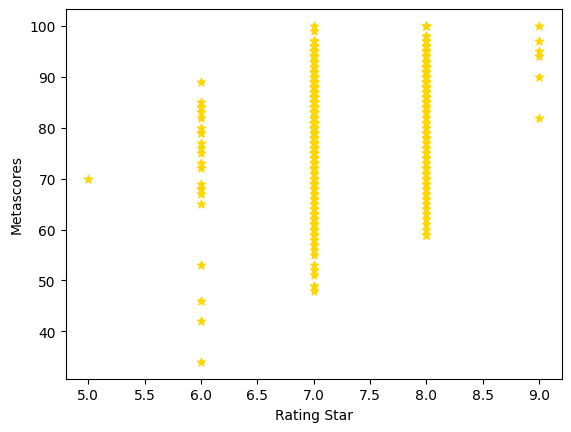

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(film_df['Rating Star'], film_df['Metascores'], marker='*', color='#FFD700')

plt.xlabel('Rating Star')
plt.ylabel('Metascores')
plt.show()

In [ ]:
corr = film_df['Rating Star'].corr(film_df['Metascores'], method='pearson')
print("**Restriction in Range**")
print(f"Correlation between Rating Star and Gross: {corr:.2f}")

**Restriction in Range**
Correlation between Rating Star and Gross: 0.27


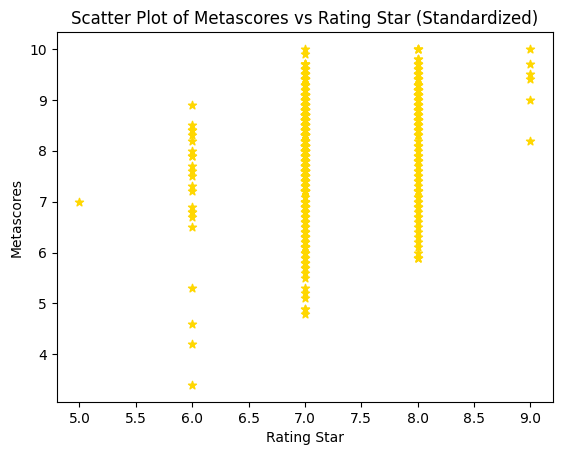

**Restriction in Range**
Correlation between Metascores and Rating Star (standardized): 0.27


In [ ]:
from sklearn.preprocessing import StandardScaler

Metascores = film_df['Metascores'] * 0.1
Rating_star = film_df['Rating Star']

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the 'Metascores' and 'Rating Star' columns
Metascores_scaled = scaler.fit_transform(Metascores.values.reshape(-1, 1))
Rating_star_scaled = scaler.fit_transform(Rating_star.values.reshape(-1, 1))

# Convert the scaled arrays back to pandas series
Metascores_scaled = pd.Series(Metascores_scaled.flatten())
Rating_star_scaled = pd.Series(Rating_star_scaled.flatten())

# Plot the scatter plot
plt.scatter(Rating_star, Metascores, marker='*', color='#FFD700')
plt.xlabel('Rating Star')
plt.ylabel('Metascores')
plt.title('Scatter Plot of Metascores vs Rating Star (Standardized)')
plt.show()

# Calculate the correlation coefficient
corr = Rating_star_scaled.corr(Metascores_scaled)
print("**Restriction in Range**")
print(f"Correlation between Metascores and Rating Star (standardized): {corr:.2f}")

## **Chi-Square Test for Independence between Film Winning and Drama Genre**

Use Film Title and Year to check because some film has the same name 

In [ ]:
import pandas as pd
import numpy as np

# Making a a new column called Winning then giving label 1 for Winning 
film_df['Winning'] = film_df.apply(lambda x: 1 if len(BPAA_df[(BPAA_df['Film Title'] == x['Film Title']) & (BPAA_df['Year'] == x['Year'])]) > 0 else 0, axis=1)
film_df['Winning'].value_counts()

0    496
1     95
Name: Winning, dtype: int64

In [ ]:
ct_winning_drama = pd.crosstab(film_df['Winning'], film_df['Drama'], rownames=['Drama'], colnames=['Winning'])
ct_winning_drama.columns = ['Not Winning', 'Winning']
ct_winning_drama

,Not Winning,Winning
Drama,,
0,64,432
1,7,88


        Chi-Square Test for Independence

          0W            1W           Sum
           O    E        O     E
    0D    64   59.64   432   436.8   496   (84%)
    1D     7   11.36    88    83.2    95   (16%)
    Sum   71   71      520   520     591  (100%) 


    X^2 = ∑[((O−E)^2)/E]  
        = ((64-59.64)^2)/59.64 + ((432-436.8)^2)/436.8 + ((7-11.36)^2)/11.36 + ((88-83.2)^2)/83.2
        = 0.318 + 0.052 + 1.673 + 0.276
        = 2.319

    df = (Ncol - 1) (Nrow -1)
       =  1

    cutoff(0.05) = 3.841

    chi-square 2.319 lower than cutoff 3.841, Fail to reject the null hypothesis at a significance level of 0.05

In [ ]:
import numpy as np

# create the contingency table
obs = np.array(ct_winning_drama)

# calculate the row and column totals
row_totals = obs.sum(axis=1)
col_totals = obs.sum(axis=0)

# calculate the overall total
total = obs.sum()

# calculate the expected cell frequencies
exp = np.outer(row_totals, col_totals) / total

# create the contingency table with expected values
ct_winning_drama_exp = np.concatenate((obs, exp), axis=1)
ct_winning_drama_exp = np.concatenate((ct_winning_drama_exp, np.array([np.sum(ct_winning_drama_exp, axis=0)])), axis=0)

ct_winning_drama_exp

array([[ 64.        , 432.        ,  59.58714044, 436.41285956],
       [  7.        ,  88.        ,  11.41285956,  83.58714044],
       [ 71.        , 520.        ,  71.        , 520.        ]])

In [ ]:
import numpy as np
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# create the contingency table
obs = ct_winning_drama

# perform the chi-square test for independence
res = chi2_contingency(obs)

# print the test results
print('Chi-square statistic : {:.4f}'.format(res.statistic))
print('p-value : {:.4f}'.format(res.pvalue))
print('Cuttoff value : {:.4f}'.format(chi2.ppf(1-0.05, res.dof)))
print('fail to reject the null hypothesis')

Chi-square statistic : 1.8167
p-value : 0.1777
Cuttoff value : 3.8415
fail to reject the null hypothesis


Fail to reject the null hypothesis


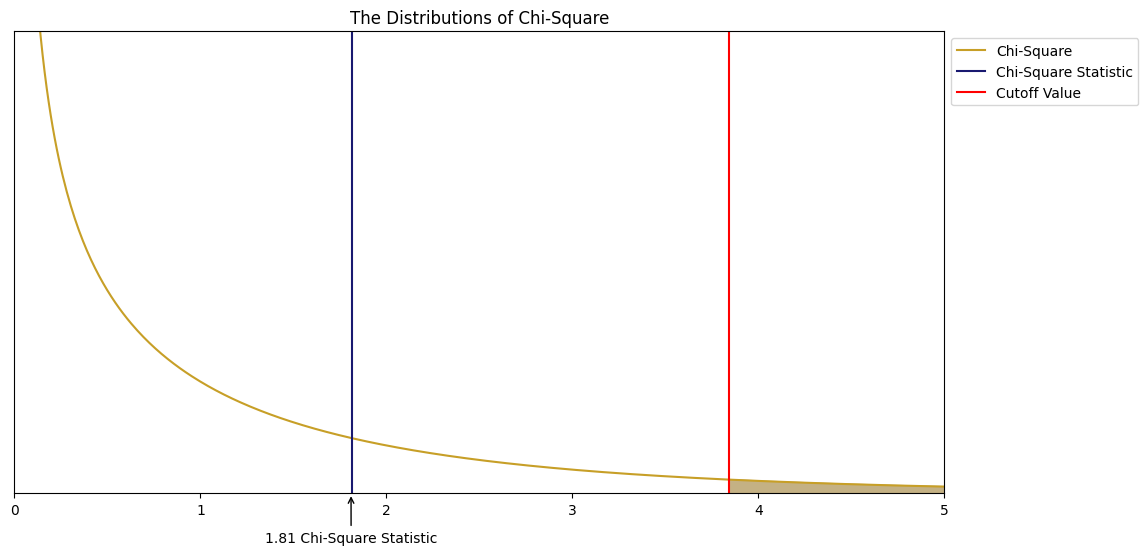

In [ ]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(12,6))
ax.axes.yaxis.set_ticks([])

statistic = res.statistic                 # Chi-square statistic
cut_off = chi2.ppf(1-0.05, res.dof)       # Cuttoff value
df = 1                                    # degree of freedom

# Chi-Square graph 
x = np.linspace(chi2.ppf(0.001, df), chi2.ppf(0.999, df), 1000)
ax.plot(x, chi2.pdf(x, df), color='#C79F27', label='Chi-Square')

ax.set_xlim((0, 5)); ax.set_ylim((0, 1))

# Fill cutoff
z = x[x>cut_off]
plt.fill_between(z, 0, chi2.pdf(z, df), color = "#c4b184")


ax.axvline(x=statistic, color='#191970', label='Chi-Square Statistic')
ax.axvline(x=cut_off, color='#FF0000', label='Cutoff Value')

ax.annotate('1.81 Chi-Square Statistic',
            xy=(1.81, 0), xycoords='data',
            xytext=(-62, -35), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))

ax.title.set_position([0.5, 1.05])
ax.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.title('The Distributions of Chi-Square')

print('Fail to reject the null hypothesis')

plt.show()

## **Remake Film and Rating**



* All Quiet on the Western Front(1930) Won, All Quiet on the Western Front (2022) nominated
* Mutiny on the Bounty(1935) Won, Mutiny on the Bounty(1962) nominated
* West Side Story(1961) Won, West Side Story(2021) nominated

In [ ]:
MoreThanOne = film_df['Film Title'].value_counts() > 1
SameTitle_nominated = film_df[film_df['Film Title'].isin(MoreThanOne[MoreThanOne].index)]
SameTitle_nominated[['Film Title', 'Year', 'Rating Star',	'Metascores', 'Winning']]

,Film Title,Year,Rating Star,Metascores,Winning
10,All Quiet on the Western Front,1930,8.0,91.0,1
30,Little Women,1933,7.0,92.0,0
39,Cleopatra,1934,6.0,NaN,0
48,Mutiny on the Bounty,1935,7.0,87.0,1
54,Les Misérables,1935,7.0,NaN,0
68,Romeo and Juliet,1936,6.0,NaN,0
72,A Star Is Born,1937,7.0,77.0,0
135,Heaven Can Wait,1943,7.0,NaN,0
225,West Side Story,1961,7.0,86.0,1
235,Mutiny on the Bounty,1962,7.0,48.0,0


In [ ]:
# 1961 is the year that separate original and remake films
cutoff_year = 1961

SameTitle_nominated.loc[SameTitle_nominated['Year'] <= cutoff_year, 'Original/Remake'] = 'Original'
SameTitle_nominated.loc[SameTitle_nominated['Year'] > cutoff_year, 'Original/Remake'] = 'Remake'

In [ ]:
SameTitle_nominated[['Film Title', 'Year', 'Rating Star',	'Metascores', 'Winning', 'Original/Remake']]

,Film Title,Year,Rating Star,Metascores,Winning,Original/Remake
10,All Quiet on the Western Front,1930,8.0,91.0,1,Original
30,Little Women,1933,7.0,92.0,0,Original
39,Cleopatra,1934,6.0,NaN,0,Original
48,Mutiny on the Bounty,1935,7.0,87.0,1,Original
54,Les Misérables,1935,7.0,NaN,0,Original
68,Romeo and Juliet,1936,6.0,NaN,0,Original
72,A Star Is Born,1937,7.0,77.0,0,Original
135,Heaven Can Wait,1943,7.0,NaN,0,Original
225,West Side Story,1961,7.0,86.0,1,Original
235,Mutiny on the Bounty,1962,7.0,48.0,0,Remake


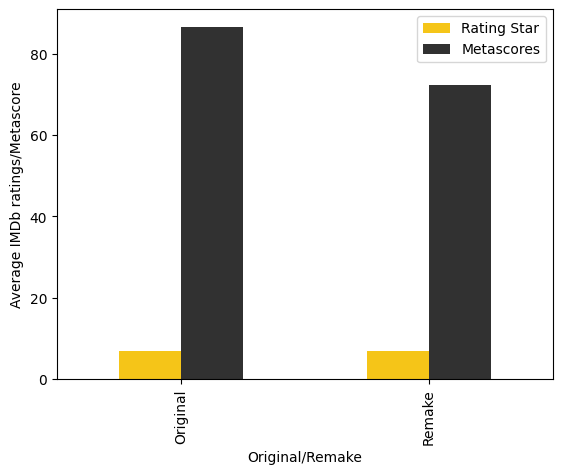

In [ ]:
import matplotlib.pyplot as plt

colors = ['#f5c518', '#313131' ]

grouped = SameTitle_nominated.groupby('Original/Remake').mean(numeric_only=True)

ax = grouped[['Rating Star', 'Metascores']].plot(kind='bar', color=colors)

ax.set_xlabel('Original/Remake')
ax.set_ylabel('Average IMDb ratings/Metascore')

plt.show()

In [ ]:
# Group by film title and original/remake
grouped = SameTitle_nominated.groupby(['Film Title', 'Original/Remake']).mean(numeric_only=True).reset_index()
pivot_table = grouped.pivot_table(index='Film Title', columns='Original/Remake', values=['Rating Star','Metascores', 'Winning'])
pivot_table 

Metascores        Rating Star         Winning  \
Original/Remake                  Original Remake    Original Remake Original   
Film Title                                                                     
A Star Is Born                       77.0   88.0         7.0    7.0      0.0   
All Quiet on the Western Front       91.0   76.0         8.0    7.0      1.0   
Cleopatra                             NaN   60.0         6.0    7.0      0.0   
Heaven Can Wait                       NaN   72.0         7.0    6.0      0.0   
Les Misérables                        NaN   63.0         7.0    7.0      0.0   
Little Women                         92.0   91.0         7.0    7.0      0.0   
Mutiny on the Bounty                 87.0   48.0         7.0    7.0      1.0   
Romeo and Juliet                      NaN   69.0         6.0    7.0      0.0   
West Side Story                      86.0   85.0         7.0    7.0      1.0   

                                       
Original/Remake                Remake  
Film Title                             
A Star Is Born                    0.0  
All Quiet on the Western Front    0.0  
Cleopatra                         0.0  
Heaven Can Wait                   0.0  
Les Misérables                    0.0  
Little Women                      0.0  
Mutiny on the Bounty              0.0  
Romeo and Juliet                  0.0  
West Side Story                   0.0

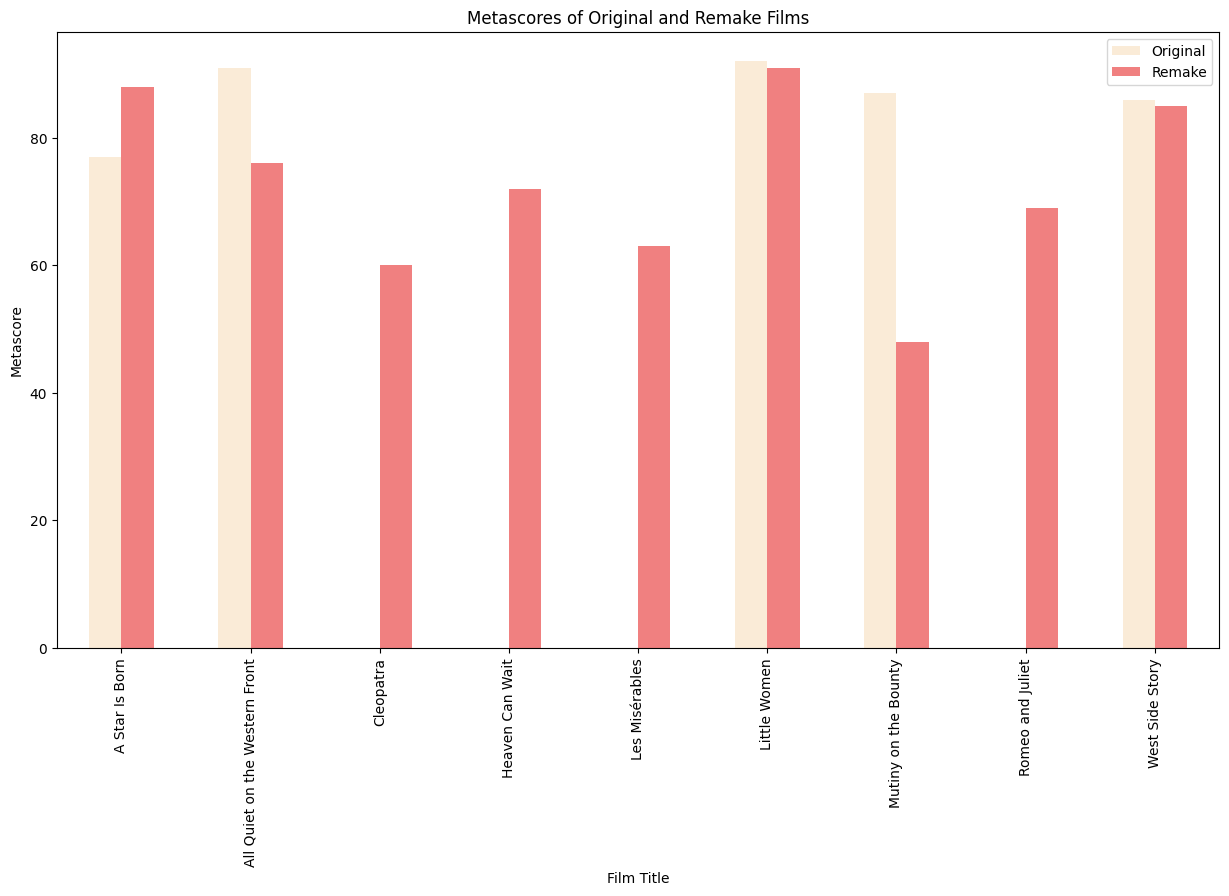

In [ ]:
colors = ['#FAEBD7', '#F08080']

# Plot bar chart
ax = pivot_table['Metascores'].plot(kind='bar', color=colors, figsize=(15, 8))

# Set axis labels and title
ax.set_xlabel('Film Title')
ax.set_ylabel('Metascore')
ax.set_title('Metascores of Original and Remake Films')

# Add legend
ax.legend(['Original', 'Remake'], loc='best')

# Show plot
plt.show()

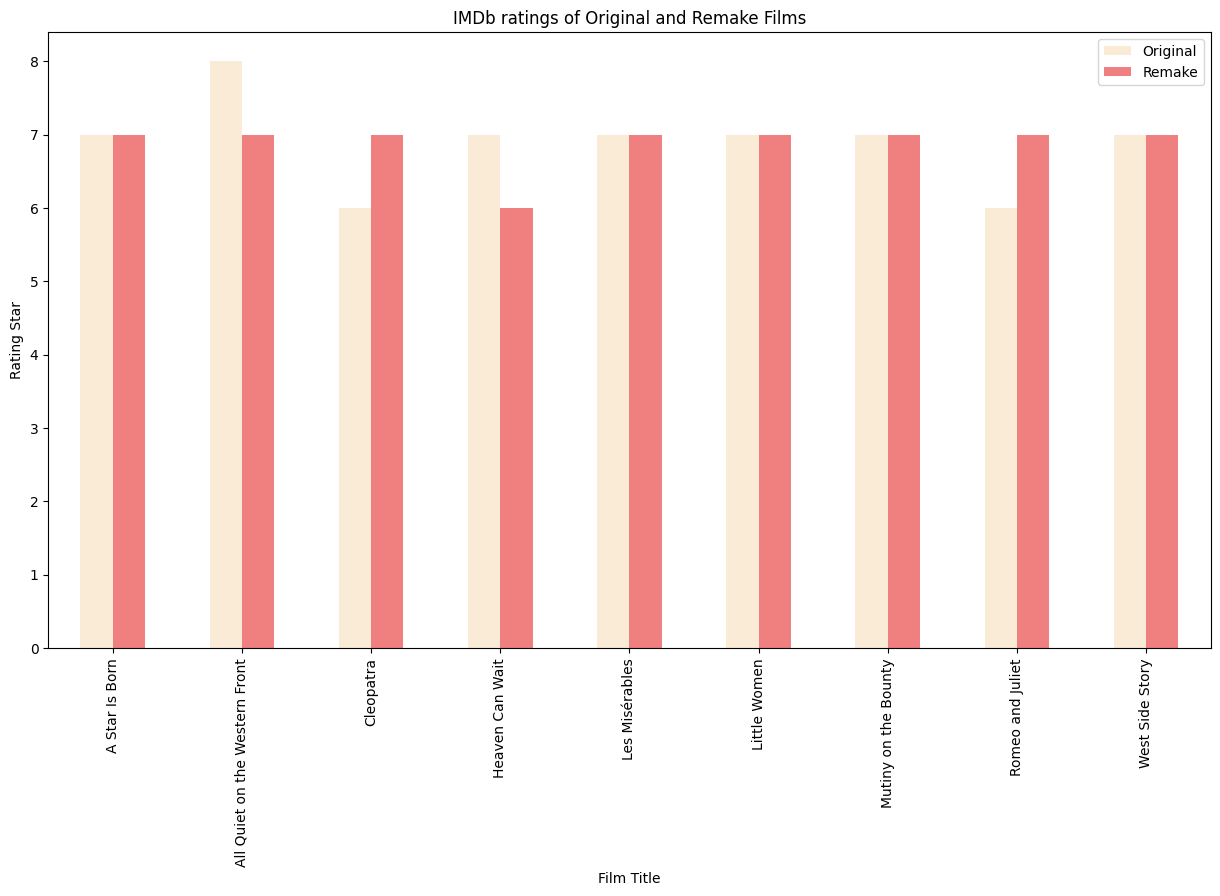

In [ ]:
# Plot bar chart
ax = pivot_table['Rating Star'].plot(kind='bar', color=colors, figsize=(15, 8))

# Set axis labels and title
ax.set_xlabel('Film Title')
ax.set_ylabel('Rating Star')
ax.set_title('IMDb ratings of Original and Remake Films')

# Add legend
ax.legend(['Original', 'Remake'], loc='best')

# Show plot
plt.show()

**Note!**

There are some remake films that have won Academy Awards.

* "The Departed" (2006) is a remake of the Hong Kong film "Infernal Affairs" (2002), and won the Academy Award for Best Picture.

* "Ben-Hur" (1959) is a remake of the silent film "Ben-Hur: A Tale of the Christ" (1925), and won the Academy Award for Best Picture.

## **Movie Rates**

In [ ]:
rates_count = film_df['Rates'].value_counts()
rates_count

R            172
Passed       100
PG-13         87
PG            73
Approved      70
Not Rated     44
G             25
Unrated       11
GP             2
TV-PG          1
TV-MA          1
M/PG           1
Name: Rates, dtype: int64

In [ ]:
# make piechart for 7 + 1 section
pie_chart = rates_count.iloc[0:7]

# the rest group by other 
other_count = rates_count.iloc[7:].sum()

pie_chart['Other'] = other_count
pie_chart

R            172
Passed       100
PG-13         87
PG            73
Approved      70
Not Rated     44
G             25
Other         16
Name: Rates, dtype: int64

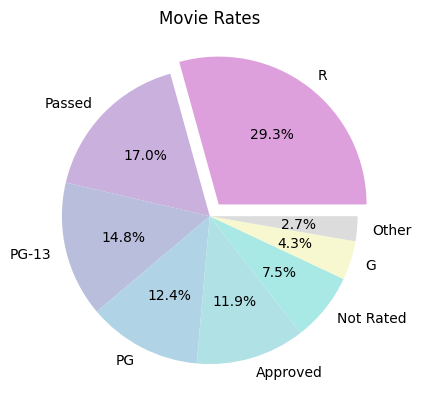

In [ ]:
import matplotlib.pyplot as plt

colors = ['#DDA0DD', '#C9B0DD', '#B8BEDB', '#B0D4E5', 
         '#B0E1E5', '#A8E9E5', '#F7F8D0', '#DCDCDC']

explode = [0.1 if i == 0 else 0 for i in range(len(pie_chart))]

plt.pie(pie_chart, labels=pie_chart.index, autopct='%1.1f%%',
        colors=colors, explode=explode)

plt.title('Movie Rates')
plt.show()

There are **five movie ratings** that are currenly **use in the present**:

* G: General Audiences
* PG: Parental Guidance Suggested (introduced in 1984)
* PG-13: Parents Strongly Cautione
* R: Restricted
* NC-17: No Children Under 17 Admitted

In [ ]:
# create a dictionary mapping the old ratings to the new ones
rating_map = {
    "G": "G",
    "PG": "PG",
    "PG-13": "PG-13",
    "R": "R",
    "Not Rated": "Unrated",
    "Passed": "G",
    "Approved": "G",
    "GP": "PG",
    "M/PG": "PG",
    "TV-MA": "R",
    "TV-PG": "PG"
}

# apply the mapping and group the ratings
new_ratings = film_df.replace({"Rates": rating_map}).groupby("Rates").size()

# create a new DataFrame with the grouped ratings
film_ratings_pie = pd.DataFrame(new_ratings, columns=["count"]).sort_values(by="count", ascending=False)
film_ratings_pie

,count
Rates,
G,195
R,173
PG-13,87
PG,77
Unrated,55


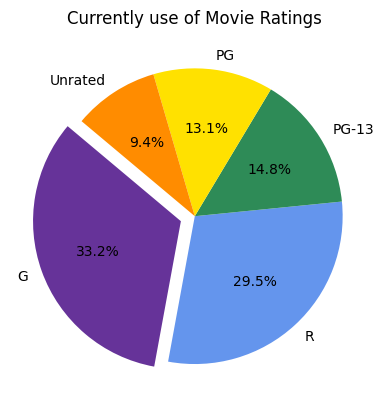

In [ ]:
import matplotlib.pyplot as plt

# create a list of colors for the pie chart
colors = ["#663399", "#6495ED", "#2E8B57", "#FFE100", "#FF8C00"]

explode = [0.1 if i == 0 else 0 for i in range(len(film_ratings_pie))]

# create the pie chart
plt.pie(film_ratings_pie["count"], labels=film_ratings_pie.index, autopct='%1.1f%%', 
        colors=colors, explode=explode, startangle=140)

# add a title to the chart
plt.title("Currently use of Movie Ratings")

# display the chart
plt.show()

## **Gross**

### **Average Highest Grossing Films By Year**

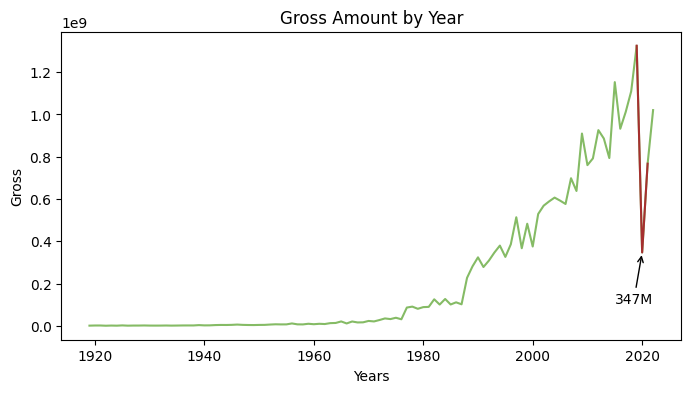

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))

HGF_df_year_m = HGF_df['Gross'].groupby(HGF_df['Year']).mean()

ax.plot(HGF_df_year_m.index, HGF_df_year_m.values, color='#85bb65')

# High Gross film between covid
mask = (HGF_df['Year'] >= 2019)  & (HGF_df['Year'] <= 2021)
HGF_df_incident = HGF_df[mask]['Gross'].groupby(HGF_df[mask]['Year']).mean()
ax.plot(HGF_df_incident.index, HGF_df_incident.values, color='#a62f2f')

# add annotation to year 2020 mean gross value
mean_gross_2020 = HGF_df_incident[2020]
ax.annotate(f'{mean_gross_2020/1e6:.0f}M', xy=(2020, mean_gross_2020),
            xytext=(2020-5, mean_gross_2020*0.3),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

plt.xlabel('Years')
plt.ylabel('Gross')
plt.title('Gross Amount by Year')

plt.show()

### **Ticket Price By Year**

In [ ]:
ticket_df.head()

,Year,Price
0,1910,0.07
1,1924,0.25
2,1929,0.35
3,1934,0.23
4,1935,0.24


In [ ]:
ticket_df['Year'] = pd.to_datetime(ticket_df['Year'], format='%Y')
ticket_df.head()

,Year,Price
0,1910-01-01,0.07
1,1924-01-01,0.25
2,1929-01-01,0.35
3,1934-01-01,0.23
4,1935-01-01,0.24


In [ ]:
year =  pd.date_range(start=str(ticket_df.Year.min()), end=str(ticket_df.Year.max()),
                            freq='YS')
year

DatetimeIndex(['1910-01-01', '1911-01-01', '1912-01-01', '1913-01-01',
               '1914-01-01', '1915-01-01', '1916-01-01', '1917-01-01',
               '1918-01-01', '1919-01-01',
               ...
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', length=111, freq='AS-JAN')

In [ ]:
ticket_ts = pd.DataFrame({'Year': year})
ticket_ts.head()

,Year
0,1910-01-01
1,1911-01-01
2,1912-01-01
3,1913-01-01
4,1914-01-01


In [ ]:
ticket_ts = pd.merge(ticket_ts, ticket_df, how="outer")
ticket_ts.head()

,Year,Price
0,1910-01-01,0.07
1,1911-01-01,NaN
2,1912-01-01,NaN
3,1913-01-01,NaN
4,1914-01-01,NaN


In [ ]:
# use value from the front to fill missing value
ticket_ts = ticket_ts.fillna(method="ffill")

In [ ]:
ticket_ts.Price.astype(float)

0      0.07
1      0.07
2      0.07
3      0.07
4      0.07
       ... 
106    8.65
107    8.97
108    9.11
109    9.01
110    9.37
Name: Price, Length: 111, dtype: float64

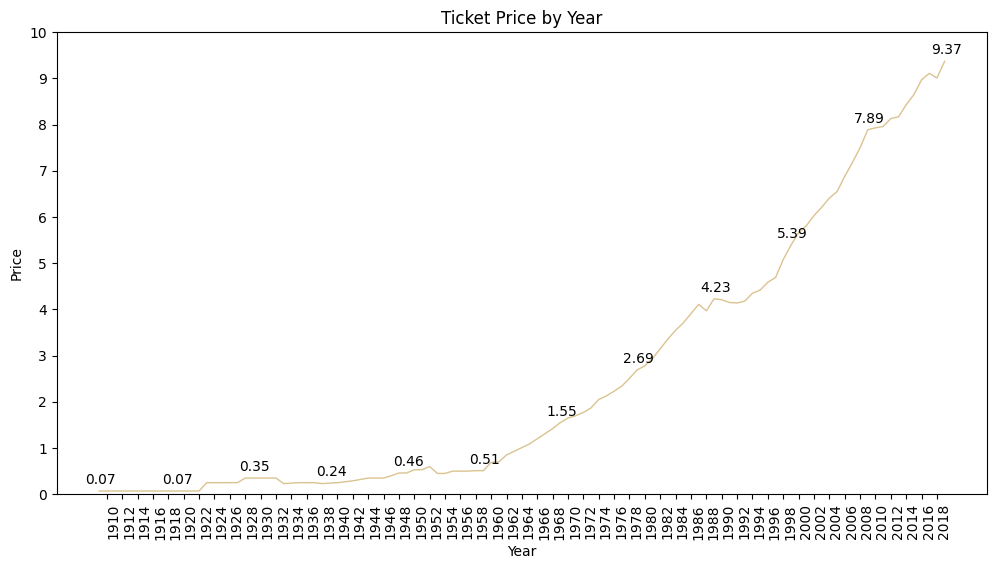

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))

xticks = pd.date_range(start=ticket_ts.Year.min(), end=ticket_ts.Year.max(), freq='Y')
plt.xticks(xticks[::2], xticks.strftime("%Y")[::2], rotation=90, ha="left")

yticks = np.arange(0, 110, step=1)
plt.yticks(yticks)

ticket_p = ticket_ts.Price.groupby(ticket_ts.Year).mean()

ax.plot(ticket_ts.Year, ticket_p.values, linewidth=1, color='#dbc390')

# annotate the price every decade
for i, price in enumerate(ticket_p):
  if i % 10 == 0:
    ax.annotate('{:.2f}'.format(price), 
                xy=(ticket_p.index[i], price),
                xytext=(-10, 5),
                textcoords='offset points')
    

plt.ylim([0, 10])
plt.xlabel("Year")
plt.ylabel("Price")
plt.title('Ticket Price by Year')
plt.show()

### **Estimate Ticket Price**

In [ ]:
n_train = 80
def eval_on_features(features, target, model):
  X_train, X_test = features[:n_train], features[n_train:]
  y_train, y_test = target[:n_train], target[n_train:]
  model.fit(X_train, y_train)
  print("Test-set R^2: {:.2f}".format(model.score(X_test, y_test)))
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  plt.figure(figsize = (10, 4))

  plt.xticks(range(0, len(features)-1, 2), xticks.strftime("%Y")[::2], rotation=90, ha="left")
  
  plt.plot(range(n_train), y_train, label="train")
  plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
  plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
  plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="prediction test")
  plt.gca().yaxis.set_major_locator(MultipleLocator(2))
 
  plt.legend(loc=(1.01, 0))
  plt.xlabel("Years")
  plt.ylabel("Price")

Test-set R^2: -2.98


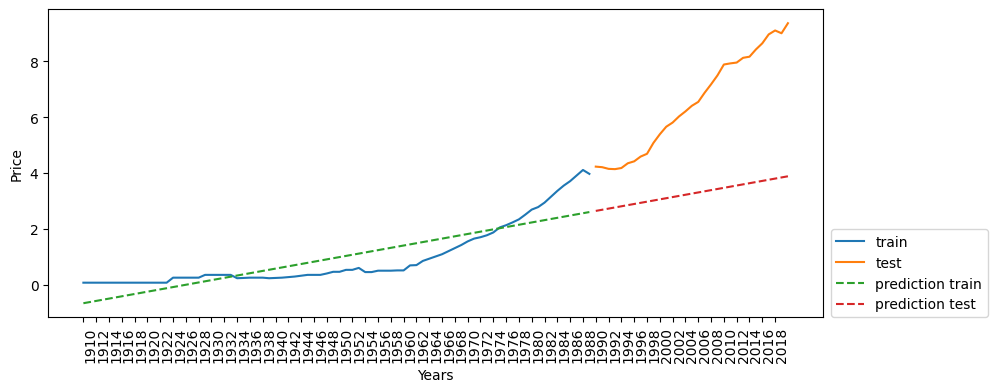

In [ ]:
from sklearn.linear_model import LinearRegression

X = ticket_ts['Year'].dt.year.values.reshape(-1, 1)
y = ticket_ts.Price.groupby(ticket_ts.Year).mean()

lr = LinearRegression()

eval_on_features(X, y, lr)

Test-set R^2: -2.02


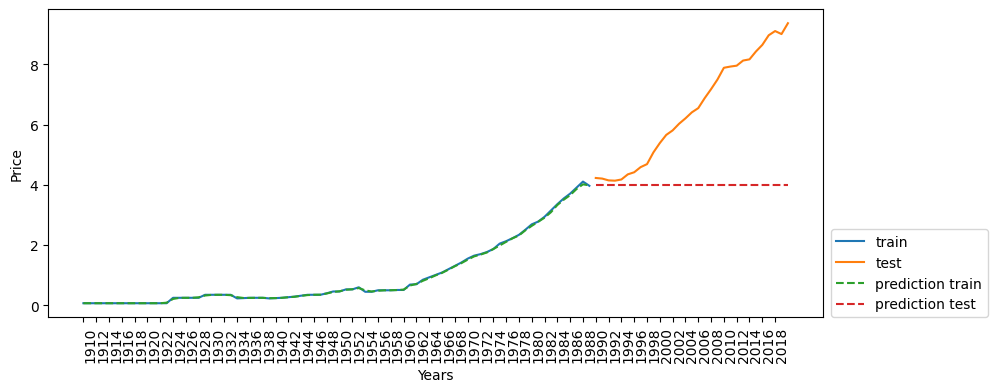

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=100, random_state=0)

eval_on_features(X, y, RF)

Test-set R^2: 0.93


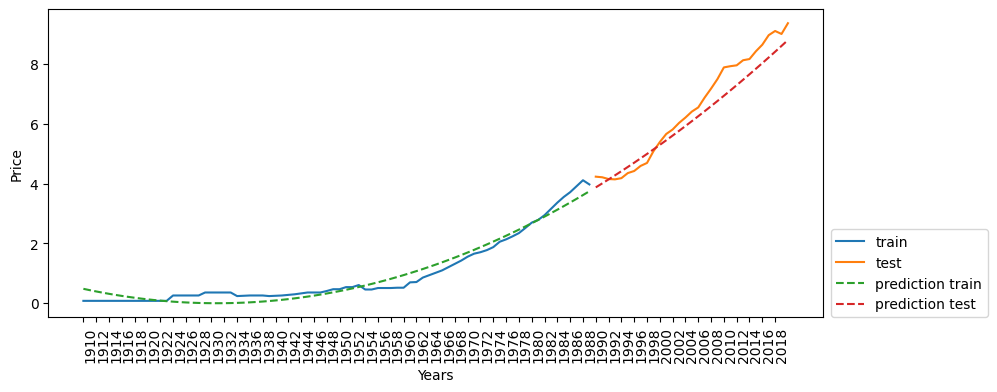

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(X.reshape(-1, 1))

lr = LinearRegression()

eval_on_features(poly_features, y, lr)

In [ ]:
ticket_ts[ticket_ts['Year'].dt.year >= 2010]

,Year,Price
100,2010-01-01,7.89
101,2011-01-01,7.93
102,2012-01-01,7.96
103,2013-01-01,8.13
104,2014-01-01,8.17
105,2015-01-01,8.43
106,2016-01-01,8.65
107,2017-01-01,8.97
108,2018-01-01,9.11
109,2019-01-01,9.01


In [ ]:
years = np.arange(2010, 2043)
X_pred = poly.fit_transform(years.reshape(-1, 1))

ticket_price_pred = lr.predict(X_pred)

# Print the predicted ticket price
for year, price in zip(years, ticket_price_pred):
    print(f"Year {year}: {price:.2f}")

Year 2010: 6.94
Year 2011: 7.12
Year 2012: 7.29
Year 2013: 7.48
Year 2014: 7.66
Year 2015: 7.84
Year 2016: 8.03
Year 2017: 8.22
Year 2018: 8.41
Year 2019: 8.61
Year 2020: 8.81
Year 2021: 9.00
Year 2022: 9.21
Year 2023: 9.41
Year 2024: 9.61
Year 2025: 9.82
Year 2026: 10.03
Year 2027: 10.24
Year 2028: 10.46
Year 2029: 10.68
Year 2030: 10.89
Year 2031: 11.12
Year 2032: 11.34
Year 2033: 11.56
Year 2034: 11.79
Year 2035: 12.02
Year 2036: 12.25
Year 2037: 12.49
Year 2038: 12.73
Year 2039: 12.96
Year 2040: 13.21
Year 2041: 13.45
Year 2042: 13.69


### **Movie Popularity by Ticket Sold**

In [ ]:
# There are about 218 films that are nominated and in High Gross Film
mask = film_df['Film Title'].isin(HGF_df['Title'])
print(mask.sum())

218


In [ ]:
matched_titles = film_df.loc[film_df['Film Title'].isin(HGF_df['Title']), 'Film Title']
matched_titles

0                               Wings
1                          7th Heaven
6                 The Broadway Melody
7         The Hollywood Revue of 1929
10     All Quiet on the Western Front
                    ...              
557                      Little Women
575                   West Side Story
581          Avatar: The Way of Water
584                 Top Gun: Maverick
586    All Quiet on the Western Front
Name: Film Title, Length: 218, dtype: object

In [ ]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Film Title   591 non-null    object 
 1   Year         591 non-null    int64  
 2   Rates        587 non-null    object 
 3   Length       591 non-null    int64  
 4   Genres       591 non-null    object 
 5   Rating Star  590 non-null    float64
 6   Metascores   442 non-null    float64
 7   Summaries    591 non-null    object 
 8   Directors    591 non-null    object 
 9   Stars        591 non-null    object 
 10  Votes        590 non-null    float64
 11  Gross        415 non-null    float64
 12  Action       591 non-null    int64  
 13  Adventure    591 non-null    int64  
 14  Animation    591 non-null    int64  
 15  Biography    591 non-null    int64  
 16  Comedy       591 non-null    int64  
 17  Crime        591 non-null    int64  
 18  Drama        591 non-null    int64  
 19  Family  

In [ ]:
ticket_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    111 non-null    datetime64[ns]
 1   Price   111 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.6+ KB


In [ ]:
price_by_year = ticket_ts[['Year', 'Price']].copy()
price_by_year['Year'] = ticket_ts['Year'].dt.year
price_by_year.head()

,Year,Price
0,1910,0.07
1,1911,0.07
2,1912,0.07
3,1913,0.07
4,1914,0.07


In [ ]:
update_ticket_price = pd.DataFrame({'Year': [2021, 2022, 2023], 
                                    'Price':[9.50, 9.75, 10.00]})

price_by_year = pd.concat([price_by_year, update_ticket_price], ignore_index=True)
price_by_year.tail()

,Year,Price
109,2019,9.01
110,2020,9.37
111,2021,9.5
112,2022,9.75
113,2023,10.0


In [ ]:
ticket_sold = pd.merge(film_df, price_by_year, on='Year')
ticket_sold['Price'] = ticket_sold['Price'].astype(float)

film_df['Ticket Sold'] = ticket_sold['Gross'] / ticket_sold['Price']

In [ ]:
film_df[['Film Title', 'Gross', 'Ticket Sold']].head()

,Film Title,Gross,Ticket Sold
0,Wings,6590000.0,26360000.0
1,7th Heaven,3920000.0,15680000.0
2,In Old Arizona,2830000.0,11320000.0
3,The Racket,NaN,NaN
4,The Patriot,NaN,NaN


In [ ]:
max_index = film_df['Ticket Sold'].idxmax()
max_row = film_df.loc[max_index]
print(max_row)

Film Title                                    Gone with the Wind
Year                                                        1939
Rates                                                     Passed
Length                                                       238
Genres                                         Drama,Romance,War
Rating Star                                                  8.0
Metascores                                                  97.0
Summaries      American motion picture classic in which a man...
Directors                   Victor Fleming,George Cukor,Sam Wood
Stars          Clark Gable,Vivien Leigh,Thomas Mitchell,Barba...
Votes                                                   320952.0
Gross                                                198680000.0
Action                                                         0
Adventure                                                      0
Animation                                                      0
Biography                

In [ ]:
top_10 = film_df.sort_values('Ticket Sold', ascending=False).head(10)
top_10[['Film Title', 'Year', 'Gross', 'Ticket Sold']]

,Film Title,Year,Gross,Ticket Sold
91,Gone with the Wind,1939,198680000.0,8.638261e+08
200,The Ten Commandments,1956,93740000.0,1.874800e+08
245,The Sound of Music,1965,163210000.0,1.615941e+08
330,E.T.,1982,435110000.0,1.479966e+08
216,Ben-Hur,1959,74700000.0,1.464706e+08
305,Star Wars,1977,322740000.0,1.447265e+08
405,Titanic,1997,659330000.0,1.436449e+08
286,The Exorcist,1973,232910000.0,1.315876e+08
296,Jaws,1975,260000000.0,1.268293e+08
246,Doctor Zhivago,1965,111720000.0,1.106139e+08


In [ ]:
ticket_sold_HGF = pd.merge(HGF_df, price_by_year, on='Year')
ticket_sold_HGF['Price'] = ticket_sold_HGF['Price'].astype(float) 

HGF_df['Ticket Sold'] = ticket_sold_HGF['Gross'] / ticket_sold_HGF['Price']

In [ ]:
top_10_HGF = HGF_df.sort_values('Ticket Sold', ascending=False).head(10)
top_10_HGF[['Title', 'Year', 'Gross', 'Ticket Sold']]

,Title,Year,Gross,Ticket Sold
757,Titanic,1997,1843201268,4.015689e+08
877,Avatar,2009,2743577587,3.658103e+08
977,Avengers: Endgame,2019,2797501328,3.104885e+08
937,Star Wars: The Force Awakens,2015,2068223624,2.453409e+08
1007,Avatar: The Way of Water,2022,2312460986,2.371755e+08
967,Avengers: Infinity War,2018,2048359754,2.248474e+08
717,Jurassic Park,1993,914691120,2.209399e+08
997,Spider-Man: No Way Home,2021,1912233593,2.012877e+08
938,Jurassic World,2015,1670400637,1.981495e+08
907,The Avengers,2012,1518815515,1.908060e+08


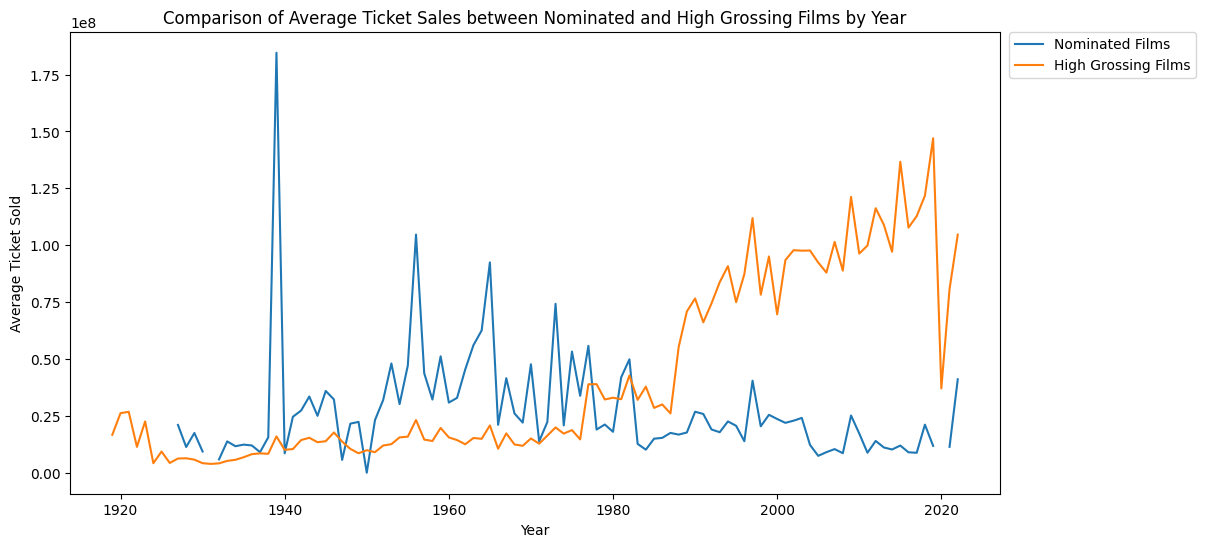

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))

# Average Nominated Films by Year
decade_group = film_df.groupby('Year')['Ticket Sold'].mean()
ax.plot(decade_group.index, decade_group.values, label='Nominated Films')

# Average High Grossing Films by Year
decade_group_HGF = HGF_df.groupby('Year')['Ticket Sold'].mean()
ax.plot(decade_group_HGF.index, decade_group_HGF.values, label='High Grossing Films')

plt.legend(loc=(1.01, 0.9))
plt.title('Comparison of Average Ticket Sales between Nominated and High Grossing Films by Year')
plt.xlabel('Year')
plt.ylabel('Average Ticket Sold')
plt.show()

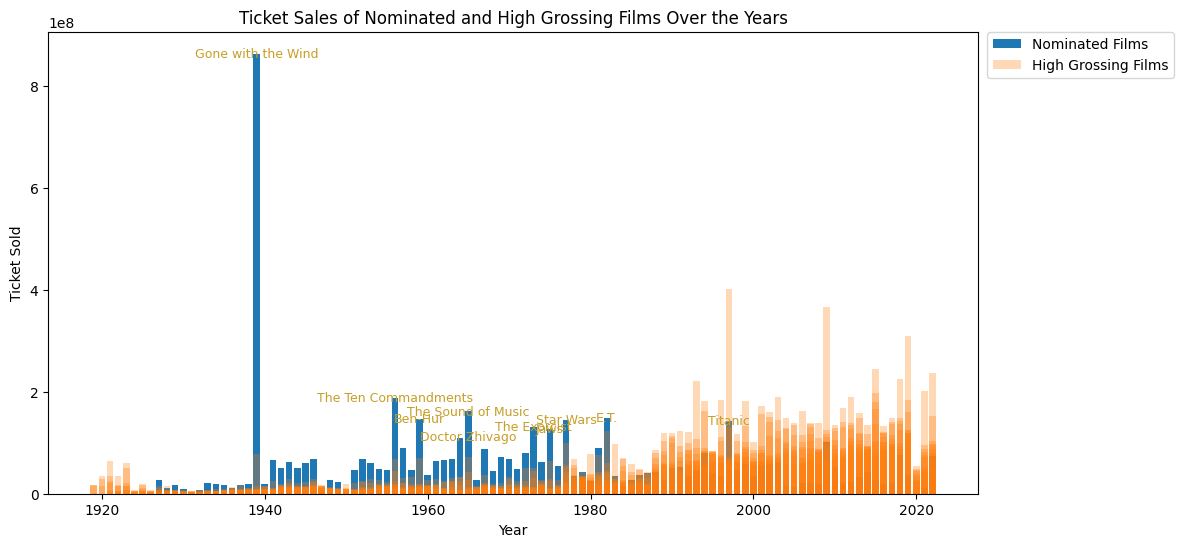

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))

# Nominated Films
ax.bar(film_df['Year'], film_df['Ticket Sold'], label='Nominated Films')

# High Grossing Films
ax.bar(HGF_df['Year'], HGF_df['Ticket Sold'], alpha=0.3, label='High Grossing Films')


top_5_films = film_df.nlargest(10, 'Ticket Sold')

for i, film in top_5_films.iterrows():
  ax.annotate(film['Film Title'], xy=(film['Year'], film['Ticket Sold']), 
              xytext=(film['Year'], film['Ticket Sold']),
              ha='center', va='center', fontsize=9, color='#C79F27')

plt.legend(loc=(1.01, 0.9))
plt.title('Ticket Sales of Nominated and High Grossing Films Over the Years')
plt.xlabel('Year')
plt.ylabel('Ticket Sold')
plt.show()

**Notice!**

It's important to validate the method used to collect movie Gross over time, as this would provide greater accuracy and insights into the industry trends

## **Text Analysis**

In [ ]:
all_movies_df = film_df['Summaries']
all_movies_df

0      Two young men, one rich, one middle class, who...
1      A street cleaner saves a young woman's life, a...
2      A charming, happy-go-lucky bandit in old Arizo...
3      An honest police captain vows to bring down a ...
4      Paul I, the Emperor of All Russia, becomes the...
                             ...                        
586    A young German soldier's terrifying experience...
587    Growing up in post-World War II era Arizona, y...
588    Set in the international world of Western clas...
589    The life of American music icon Elvis Presley,...
590    Do nothing, stay and fight, or leave. In 2010,...
Name: Summaries, Length: 591, dtype: object

In [ ]:
nominated_movies_df = film_df['Summaries'][film_df['Winning'] == 0]
nominated_movies_df

1      A street cleaner saves a young woman's life, a...
2      A charming, happy-go-lucky bandit in old Arizo...
3      An honest police captain vows to bring down a ...
4      Paul I, the Emperor of All Russia, becomes the...
5      Prime Minister of Great Britain Benjamin Disra...
                             ...                        
586    A young German soldier's terrifying experience...
587    Growing up in post-World War II era Arizona, y...
588    Set in the international world of Western clas...
589    The life of American music icon Elvis Presley,...
590    Do nothing, stay and fight, or leave. In 2010,...
Name: Summaries, Length: 496, dtype: object

In [ ]:
winning_movies_df = film_df['Summaries'][film_df['Winning'] == 1]
winning_movies_df

0      Two young men, one rich, one middle class, who...
6      A pair of sisters from the vaudeville circuit ...
10     A German youth eagerly enters World War I, but...
13     A newspaper editor settles in an Oklahoma boom...
24     A group of very different individuals staying ...
                             ...                        
546    A working-class Italian-American bouncer becom...
556    Greed and class discrimination threaten the ne...
566    A woman in her sixties, after losing everythin...
573    As a CODA (Child of Deaf Adults) Ruby is the o...
582    A middle-aged Chinese immigrant is swept up in...
Name: Summaries, Length: 95, dtype: object

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
def join_text(movie_summary_df):
  return ' '.join([summary.lower() for summary in movie_summary_df])

In [ ]:
all_movie_summaries = join_text(all_movies_df)
all_movie_summaries[:1000]

"two young men, one rich, one middle class, who are in love with the same woman, become fighter pilots in world war i. a street cleaner saves a young woman's life, and the pair slowly fall in love until war intervenes. a charming, happy-go-lucky bandit in old arizona plays cat-and-mouse with the sheriff trying to catch him while he romances a local beauty. an honest police captain vows to bring down a powerful bootlegger who is protected by corrupt politicians and judges. paul i, the emperor of all russia, becomes the target of a deadly conspiracy. prime minister of great britain benjamin disraeli outwits the subterfuge of the russians and chicanery at home in order to secure the purchase of the suez canal. a pair of sisters from the vaudeville circuit try to make it big time on broadway, but matters of the heart complicate the attempt. an all-star revue featuring mgm contract players. the queen of mythical sylvania marries a courtier, who finds his new life unsatisfying. chick william

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

In [ ]:
add_stop = [',', '.', '\'s', '...', '-', '»' , ';']
stop_words  = stopwords.words("english")
stop_words.extend(add_stop)

In [ ]:
def clean_text(text):
  words = word_tokenize(text)
  filtered_sum = [w for w in words if w not in stop_words]
  return filtered_sum

In [ ]:
filtered_all_movie_sum = clean_text(all_movie_summaries)
filtered_all_movie_sum[:20]

['two',
 'young',
 'men',
 'one',
 'rich',
 'one',
 'middle',
 'class',
 'love',
 'woman',
 'become',
 'fighter',
 'pilots',
 'world',
 'war',
 'i.',
 'street',
 'cleaner',
 'saves',
 'young']

In [ ]:
import re

def remove_punc(text):
    remove_dot = [re.sub(r'\.', '', word) for word in text]
    clean_text = [word for w in remove_dot for word in re.split(r'/', w)]
    return clean_text

In [ ]:
clean_all_movie_sum = remove_punc(filtered_all_movie_sum)
clean_all_movie_sum[:20]

['two',
 'young',
 'men',
 'one',
 'rich',
 'one',
 'middle',
 'class',
 'love',
 'woman',
 'become',
 'fighter',
 'pilots',
 'world',
 'war',
 'i',
 'street',
 'cleaner',
 'saves',
 'young']

In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

In [ ]:
def lem_text(text):
  lem_word = [WordNetLemmatizer().lemmatize(w) for w in text]
  return lem_word

In [ ]:
lem_all_movie = lem_text(clean_all_movie_sum)
lem_all_movie[:20]

['two',
 'young',
 'men',
 'one',
 'rich',
 'one',
 'middle',
 'class',
 'love',
 'woman',
 'become',
 'fighter',
 'pilot',
 'world',
 'war',
 'i',
 'street',
 'cleaner',
 'save',
 'young']

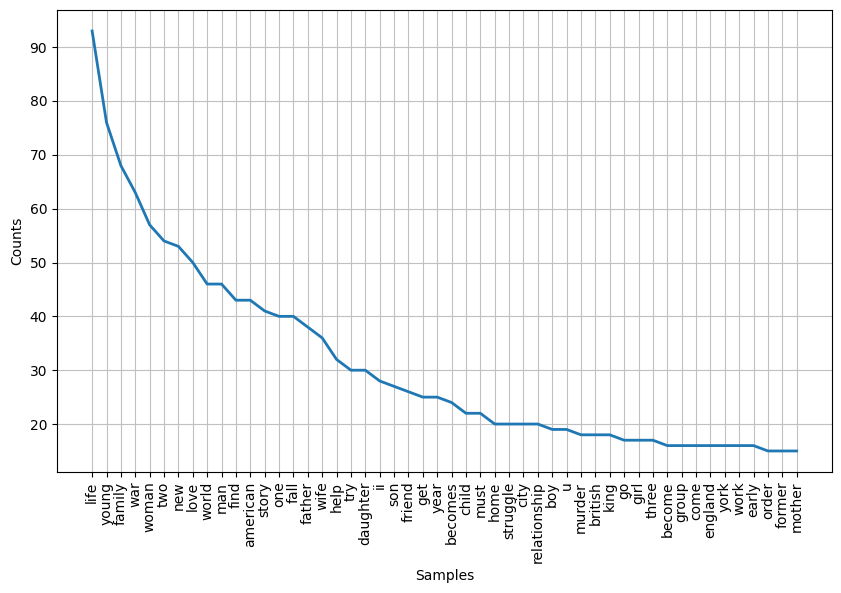

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

freq_dist = nltk.FreqDist(lem_all_movie)
freq_dist.plot(50)

plt.show()

In [ ]:
max_word_lengths = [max(len(word) for word, _ in freq_dist.most_common())][0]
longest_word = [word for word, _ in freq_dist.most_common() if len(word) == max_word_lengths][0]
print(max_word_lengths, longest_word)

21 courtesan-in-training


In [ ]:
film_df[['Film Title', 'Year', 'Summaries', 'Rates']][film_df['Summaries'].str.contains(str(longest_word))]

,Film Title,Year,Summaries,Rates
211,Gigi,1958,"Weary of the conventions of Parisian society, ...",G


In [ ]:
for word, count  in freq_dist.most_common(50):
  print("{:21} .... {:02d}".format(word,count))

life                  .... 93
young                 .... 76
family                .... 68
war                   .... 63
woman                 .... 57
two                   .... 54
new                   .... 53
love                  .... 50
world                 .... 46
man                   .... 46
find                  .... 43
american              .... 43
story                 .... 41
one                   .... 40
fall                  .... 40
father                .... 38
wife                  .... 36
help                  .... 32
try                   .... 30
daughter              .... 30
ii                    .... 28
son                   .... 27
friend                .... 26
get                   .... 25
year                  .... 25
becomes               .... 24
child                 .... 22
must                  .... 22
home                  .... 20
struggle              .... 20
city                  .... 20
relationship          .... 20
boy                   .... 19
u         

In [ ]:
film_df[['Film Title', 'Year', 'Summaries', 'Winning']][film_df['Summaries'].str.contains('New York')]

,Film Title,Year,Summaries,Winning
36,It Happened One Night,1934,A renegade reporter trailing a young runaway h...,1
62,Mr. Deeds Goes to Town,1936,A unassuming greeting card poet from a small t...,0
77,Dead End,1937,"The lives of a young man, a young woman, an in...",0
156,Miracle on 34th Street,1947,After a divorced New York mother hires a nice ...,0
205,12 Angry Men,1957,The jury in a New York City murder trial is fr...,0
225,West Side Story,1961,Two youngsters from rival New York City gangs ...,1
265,Midnight Cowboy,1969,A naive hustler travels from Texas to New York...,1
268,"Hello, Dolly!",1969,Matchmaker Dolly Levi travels to Yonkers to fi...,0
281,The Godfather,1972,The aging patriarch of an organized crime dyna...,1
290,The Godfather Part II,1974,The early life and career of Vito Corleone in ...,1


## **Topic Modelling**

### **All Films**

In [ ]:
import spacy
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
  nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"]) 
  texts_out = []
  for text in texts:
    doc = nlp(text)
    new_text = []
    for token in doc:
      if token.pos_ in allowed_postags:
        new_text.append(token.lemma_)
    final = " ".join(new_text) 
    texts_out.append(final)
  return (texts_out)

In [ ]:
lemmatized_texts = lemmatization(all_movies_df)
print(lemmatized_texts[0])

young man rich middle class love same woman become fighter pilot


In [ ]:
import gensim 
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
def gen_words(texts):
  final = []
  for text in texts:
    new = gensim.utils.simple_preprocess(text, deacc=True) 
    final.append(new)
  return (final)

In [ ]:
all_movies_gen = gen_words(lemmatized_texts)
print(all_movies_gen[0])

['young', 'man', 'rich', 'middle', 'class', 'love', 'same', 'woman', 'become', 'fighter', 'pilot']


In [ ]:
id2word = corpora.Dictionary(all_movies_gen)

corpus = []
for text in all_movies_gen:
  new = id2word.doc2bow(text)
  corpus.append(new)

print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [ ]:
word = id2word[[0][:1][0]]
print(word)

become


In [ ]:
from collections import Counter

word_counts = Counter(all_movies_gen[0])
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[0])

print(sorted_word_counts)

[('become', 1), ('class', 1), ('fighter', 1), ('love', 1), ('man', 1), ('middle', 1), ('pilot', 1), ('rich', 1), ('same', 1), ('woman', 1), ('young', 1)]


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=30,
                                            random_state=42,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")

In [ ]:
from pprint import pprint
pprint(lda_model.print_topics())

In [ ]:
!pip install pyLDAvis==2.1.2

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pyLDAvis.enable_notebook()
visualization = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
visualization

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7      0.384163 -0.083699       1        1  9.596594
27     0.369681  0.163352       2        1  9.205403
6     -0.347259  0.119767       3        1  6.210483
14    -0.330512 -0.125897       4        1  6.036456
2      0.055314 -0.314498       5        1  4.734390
12    -0.084064 -0.288714       6        1  4.432927
21    -0.198073 -0.224395       7        1  4.357259
16    -0.035006  0.286520       8        1  4.225610
11     0.070439  0.303546       9        1  3.990856
9      0.158947 -0.227901      10        1  3.930969
26     0.211386 -0.127540      11        1  3.498983
1     -0.127946  0.244449      12        1  3.144167
22     0.187151  0.105174      13        1  2.863384
17    -0.165225  0.152427      14        1  2.812814
25     0.100306  0.185516      15        1  2.799703
29    -0.090035  0.116122      16        1  2.706422
13    -0.176070 -0.013754      17        1  2.655993
19    -0.198092  0.060934      18        1  2.607643
18     0.190655  0.008397      19        1  2.536266
8     -0.060401 -0.163286      20        1  2.355752
20     0.126190 -0.063458      21        1  2.347050
15     0.016219  0.122035      22        1  2.338048
28     0.100090  0.103201      23        1  2.329134
10    -0.153461 -0.086868      24        1  2.260492
4      0.055395 -0.161713      25        1  2.148652
3     -0.007275 -0.092581      26        1  1.932717
24    -0.044686 -0.012544      27        1  1.037452
5      0.005904  0.003670      28        1  0.557203
23    -0.006866  0.005870      29        1  0.173591
0     -0.006866  0.005869      30        1  0.173591, topic_info=           Term        Freq       Total Category  logprob  loglift
14         life  126.000000  126.000000  Default  30.0000  30.0000
0        become   65.000000   65.000000  Default  29.0000  29.0000
4           man   89.000000   89.000000  Default  28.0000  28.0000
9         woman   87.000000   87.000000  Default  27.0000  27.0000
207      family  111.000000  111.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1733  sexuality    0.004734    1.041602  Topic30  -7.8736   0.9625
0        become    0.004734   65.512538  Topic30  -7.8736  -3.1790
1970   seasoned    0.004734    1.041602  Topic30  -7.8736   0.9625
1743      wound    0.004734    1.041602  Topic30  -7.8736   0.9625
1726       mean    0.004734    1.041602  Topic30  -7.8736   0.9625

[1073 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
248       1  0.595173  accidentally
558       2  0.863205       achieve
432      18  0.928689         actor
255       7  0.861083       actress
249       1  0.766859      adoptive
...     ...       ...           ...
179       1  0.076221          year
179       3  0.914646          year
10        1  0.670376         young
10        2  0.313974         young
10        9  0.008486         young

[606 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 28, 7, 15, 3, 13, 22, 17, 12, 10, 27, 2, 23, 18, 26, 30, 14, 20, 19, 9, 21, 16, 29, 11, 5, 4, 25, 6, 24, 1])

### **Nominated**

In [ ]:
lemmatized_texts = lemmatization(nominated_movies_df)

In [ ]:
nominated_movies_gen = gen_words(lemmatized_texts)

In [ ]:
id2word = corpora.Dictionary(nominated_movies_gen)

corpus = []
for text in nominated_movies_gen:
  new = id2word.doc2bow(text)
  corpus.append(new)

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10,
                                            random_state=42,
                                            update_every=1,
                                            chunksize=40,
                                            passes=10,
                                            alpha="auto")

In [ ]:
pyLDAvis.enable_notebook()
visualization = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
visualization

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.333006 -0.141408       1        1  20.902896
5     -0.087281  0.324771       2        1  17.590598
9     -0.238510  0.144184       3        1  11.833959
8      0.144804 -0.230757       4        1   9.987009
7      0.298097 -0.085149       5        1   9.899371
0      0.242137  0.114125       6        1   9.414669
6      0.100431  0.210724       7        1   6.403501
4     -0.038413 -0.260859       8        1   5.948501
1     -0.110259 -0.075833       9        1   4.889737
3      0.022001  0.000202      10        1   3.129759, topic_info=          Term       Freq      Total Category  logprob  loglift
174     family  60.000000  60.000000  Default  30.0000  30.0000
3         life  57.000000  57.000000  Default  29.0000  29.0000
335      story  32.000000  32.000000  Default  28.0000  28.0000
38      become  45.000000  45.000000  Default  27.0000  27.0000
198   american  30.000000  30.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
1067      plot   0.738782   1.351803  Topic10  -5.5429   2.8600
1988   theatre   0.735004   1.348843  Topic10  -5.5480   2.8571
1989  vengeful   0.735004   1.348843  Topic10  -5.5480   2.8571
1987  coincide   0.735004   1.348843  Topic10  -5.5480   2.8571
2227  surround   1.156132   2.788322  Topic10  -5.0950   2.5839

[345 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2343      8  0.922907  abruptly
885       7  0.769201    accuse
370       4  0.933893     actor
992       5  0.922759   african
1298      4  0.939450       age
...     ...       ...       ...
405       2  0.909835   working
387       2  0.976876     world
146       1  0.982685      year
11        1  0.353066     young
11        2  0.631803     young

[322 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 10, 9, 8, 1, 7, 5, 2, 4])

### **Won**

In [ ]:
lemmatized_texts = lemmatization(winning_movies_df)

In [ ]:
winning_movies_gen = gen_words(lemmatized_texts)

In [ ]:
id2word = corpora.Dictionary(winning_movies_gen)

corpus = []
for text in winning_movies_gen:
  new = id2word.doc2bow(text)
  corpus.append(new)

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10,
                                            random_state=42,
                                            update_every=1,
                                            chunksize=40,
                                            passes=10,
                                            alpha="auto")

In [ ]:
pyLDAvis.enable_notebook()
visualization = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
visualization

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.231810  0.097146       1        1  18.602631
1      0.049189  0.239706       2        1  13.845174
8     -0.222621 -0.141121       3        1  10.625147
5     -0.036341  0.102990       4        1  10.340457
7      0.031308 -0.161156       5        1  10.193804
6     -0.213411  0.130548       6        1   9.861507
3     -0.066990 -0.119879       7        1   7.881400
4     -0.038074  0.005493       8        1   7.255638
0      0.163492 -0.147662       9        1   6.624292
2      0.101638 -0.006064      10        1   4.769951, topic_info=             Term       Freq      Total Category  logprob  loglift
56         family   7.000000   7.000000  Default  30.0000  30.0000
448  relationship   8.000000   8.000000  Default  29.0000  29.0000
119      american   6.000000   6.000000  Default  28.0000  28.0000
10          young  11.000000  11.000000  Default  27.0000  27.0000
4             man   7.000000   7.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
34        century   0.509709   2.218703  Topic10  -4.6655   1.5720
298      youthful   0.239498   0.780803  Topic10  -5.4208   1.8611
512        hunter   0.300136   1.298191  Topic10  -5.1951   1.5783
296       society   0.239498   1.037730  Topic10  -5.4208   1.5766
51           stay   0.239498   1.080762  Topic10  -5.4208   1.5360

[397 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
763      10  0.605149     abandon
703       1  0.741949      abduct
528       8  0.942687     abscond
470       4  0.888099  accidental
664       2  0.816201      accuse
...     ...       ...         ...
713       3  0.496794     writing
10        1  0.452844       young
10        4  0.090569       young
10        5  0.362275       young
539       8  0.942687      yuppie

[331 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 9, 6, 8, 7, 4, 5, 1, 3])

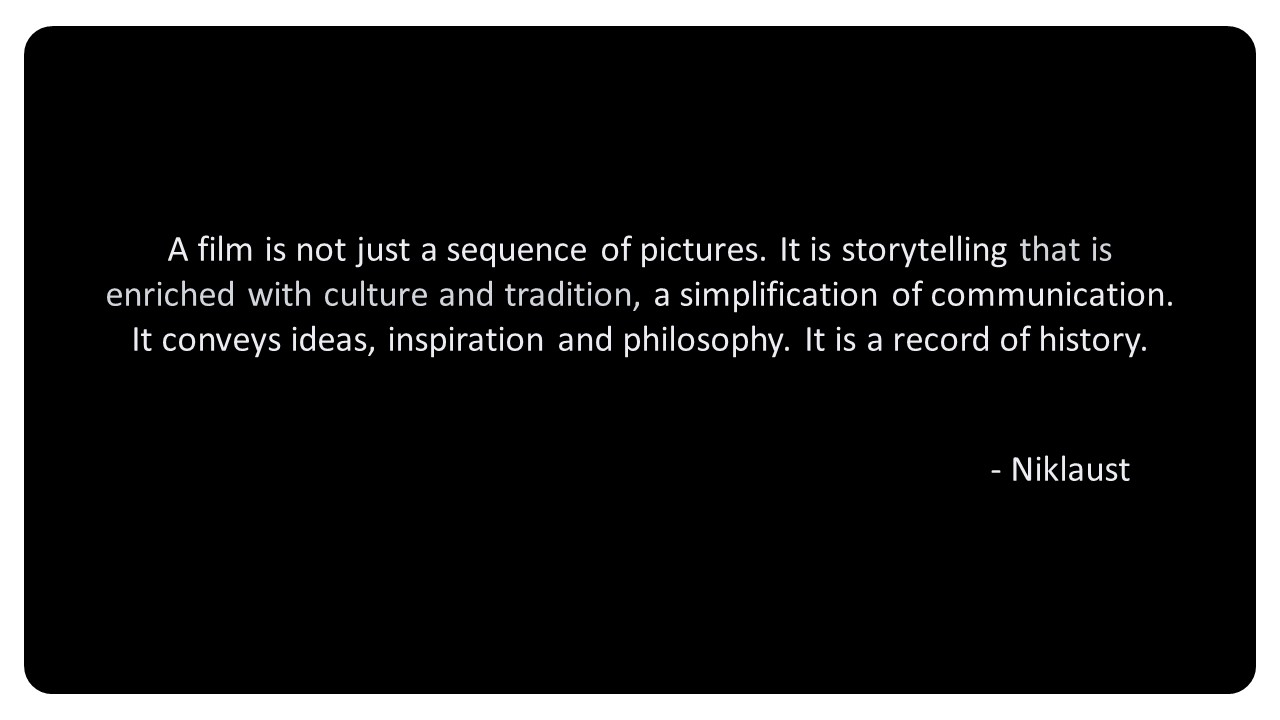